In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings 



from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
fifa= pd.read_csv('fifa21_male2.csv')

In [3]:
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [4]:
fifa.shape

(17125, 107)

In [5]:
fifa.dtypes

ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

In [6]:
pd.unique(fifa['Gender'])

array(['Male'], dtype=object)

In [7]:
fifa_cols = fifa.columns.values.tolist()

In [8]:
fifa_cols

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [9]:
fifa.isnull().sum()

ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 107, dtype: int64

In [10]:
pd.unique(fifa['POT'])

array([69, 71, 82, 81, 70, 77, 78, 80, 74, 79, 90, 72, 73, 87, 75, 89, 84,
       68, 83, 66, 76, 58, 63, 88, 86, 64, 85, 65, 67, 61, 92, 56, 54, 91,
       60, 59, 48, 57, 62, 52, 93, 55, 50, 95, 53, 49, 47])

In [11]:
pd.unique(fifa['Skill'])

array([338, 369, 387, 255, 408, 276, 406, 402, 258, 393, 283, 419, 374,
       173, 113, 288, 334, 269,  78, 128,  83, 414, 351, 376, 257, 232,
       122, 231, 265, 237,  90, 206, 423, 417, 332, 239, 383,  89, 264,
       323, 106, 298,  75, 349, 103, 296, 319, 336, 340, 326, 318, 244,
       271, 378, 123, 337, 267, 293, 287, 397, 194, 399, 108, 325, 322,
       373, 201, 343, 299, 367, 320, 359, 396, 364, 240, 273, 411, 366,
       428, 403, 310, 333, 392, 345, 303, 416, 372, 379, 362, 348, 435,
       268, 262, 263, 286, 301,  91, 120, 312, 360, 248, 280, 285, 235,
       281, 220, 306, 328, 102, 197, 229,  81, 242, 227, 370, 200, 409,
       400, 407, 386, 294, 418, 236, 375, 224, 368, 307, 371, 344, 249,
       430, 295, 385, 277, 169, 388, 401, 327, 284, 354, 316, 339, 341,
       356, 324,  87, 395, 413, 199, 377, 259, 193, 254, 225, 347, 228,
       297, 107,  99, 292, 300,  82, 311, 176, 101,  92, 329,  85, 260,
        93, 202, 331, 314,  94, 274, 230, 272, 313, 243, 100, 12

In [12]:
fifa.describe()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17118.000000,17118.000000,17067.000000,17125.000000,16702.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,60.507620,45.005742,266.607591,57.846423,49.574676,44.387270,54.324321,60.642803,322.693664,65.445898,65.443036,64.602273,62.924847,64.715591,302.414774,59.711416,65.170212,63.309606,65.308555,49.135708,261.922803,56.997839,47.085582,52.372766,55.443605,50.251445,59.940965,141.469898,47.246949,48.279358,46.099725,77.609693,15.600467,15.484672,15.472058,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,13.960635,17.729483,76.809344,18.047250,18.188344,17.504128,14.856911,15.873647,54.933593,14.657889,14.437377,14.372443,9.037279,14.031563,49.380576,13.417931,11.918063,15.313272,12.627212,19.044862,62.913935,17.021619,20.846705,19.094432,13.730080,15.696363,11.751111,61.595180,20.182548,21.483597,21.185154,81.136603,16.828637,16.143679,15.997328,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,128.000000,12.000000,22.000000,11.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.000000,59.000000,57.000000,57.000000,57.000000,272.000000,50.000000,58.000000,56.000000,58.000000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000,53.000000,84.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,63.000000,46.000000,279.000000,63.000000,51.000000,43.000000,57.000000,64.000000,331.000000,68.000000,68.000000,67.000000,63.000000,67.000000,308.000000,61.000000,66.000000,66.000000,67.000000,53.000000,269.000000,60.000000,53.000000,57.000000,57.000000,51.000000,61.000000,158.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66

In [13]:
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


## Keeping the columns I want

In [14]:
#fifa_clean = fifa.drop(['Gender', 'GK', 'RB', 'RCB','CB', 'LCB', 'LB', 'RWB', 'RDM', 'CDM','LDM', 'LWB', 'RM', 'RCM', 'CM', 'LCM', 'LM', 'RAM', 'LAM', 'RW','RF','CF', 'LF','LW','RS','ST', 'LS','D/W', 'A/W', 'W/F', 'Base Stats', 'Total Stats', 'GK Reflexes', 'GK Positioning', 'GK Kicking', 'GK Handling', 'GK Diving', 'Goalkeeping', 'Marking', 'Defending', 'Composure', 'Penalties', 'Vision', 'Positioning', 'Interceptions', 'Aggression', 'Mentality', 'Long Shots', 'Long Shots', 'Strength', 'Stamina', 'Jumping', 'Shot Power' , 'Power', 'Balance'], axis=1)
#fifa_clean.head()

In [15]:
fifa1=fifa[['Name', 'Age', 'OVA', 'Nationality','Club', 'BOV', 'BP', 'Position',  'POT', 'Attacking', 'Crossing', 'Finishing','Short Passing', 'Skill', 'Dribbling', 'Volleys','Curve', 'FK Accuracy', 'Ball Control', 'Long Passing', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Mentality', 'Vision','Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Total Stats', 'Base Stats', 'DEF', 'PAS', 'DRI', 'PHY', 'Hits', 'Value', 'Wage', 'Release Clause']].copy()
fifa1.head()

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Attacking,Crossing,Finishing,Short Passing,Skill,Dribbling,Volleys,Curve,FK Accuracy,Ball Control,Long Passing,Movement,Acceleration,Sprint Speed,Agility,Reactions,Shot Power,Jumping,Stamina,Strength,Mentality,Vision,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Total Stats,Base Stats,DEF,PAS,DRI,PHY,Hits,Value,Wage,Release Clause
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,313,75,50,71,338,73,58.0,65.0,60,71,69,347,68,74,68.0,69,74,68.0,69,68,320,66.0,NaN,208,70,69,69.0,1929,408,68,70,71,69,4,€625K,€7K,€0
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,337,68,64,76,369,69,68.0,79.0,79,71,71,305,56,50,62.0,65,75,54.0,64,60,362,73.0,79.0,153,70,43,40.0,1906,385,58,73,69,63,4,€600K,€7K,€1.1M
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,337,80,64,77,387,79,75.0,84.0,77,78,69,295,48,42,71.0,59,72,58.0,29,56,317,74.0,NaN,99,35,34,30.0,1770,354,36,76,77,52,11,€1.1M,€15K,€0
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,264,54,70,80,255,68,NaN,NaN,46,77,64,176,59,62,NaN,55,63,NaN,51,66,271,NaN,NaN,75,34,41,NaN,1348,369,47,66,69,60,3,€0,€0,€0
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,367,75,69,90,408,85,79.0,80.0,70,90,83,346,61,56,79.0,75,67,40.0,58,62,370,93.0,89.0,181,68,57,56.0,2014,420,63,85,85,59,149,€5.5M,€12K,€7.2M


In [16]:
# Removing the space from the column headers

fifa1.columns = [fifa1.columns[i].replace(' ', '_') for i in range(len(fifa1.columns))]
fifa1.head()

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Attacking,Crossing,Finishing,Short_Passing,Skill,Dribbling,Volleys,Curve,FK_Accuracy,Ball_Control,Long_Passing,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Shot_Power,Jumping,Stamina,Strength,Mentality,Vision,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Hits,Value,Wage,Release_Clause
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,313,75,50,71,338,73,58.0,65.0,60,71,69,347,68,74,68.0,69,74,68.0,69,68,320,66.0,NaN,208,70,69,69.0,1929,408,68,70,71,69,4,€625K,€7K,€0
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,337,68,64,76,369,69,68.0,79.0,79,71,71,305,56,50,62.0,65,75,54.0,64,60,362,73.0,79.0,153,70,43,40.0,1906,385,58,73,69,63,4,€600K,€7K,€1.1M
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,337,80,64,77,387,79,75.0,84.0,77,78,69,295,48,42,71.0,59,72,58.0,29,56,317,74.0,NaN,99,35,34,30.0,1770,354,36,76,77,52,11,€1.1M,€15K,€0
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,264,54,70,80,255,68,NaN,NaN,46,77,64,176,59,62,NaN,55,63,NaN,51,66,271,NaN,NaN,75,34,41,NaN,1348,369,47,66,69,60,3,€0,€0,€0
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,367,75,69,90,408,85,79.0,80.0,70,90,83,346,61,56,79.0,75,67,40.0,58,62,370,93.0,89.0,181,68,57,56.0,2014,420,63,85,85,59,149,€5.5M,€12K,€7.2M


### Separate numerical/categorical type

In [17]:
fifa1_num=fifa1.select_dtypes(include=np.number)
fifa1_num.head()

,Age,OVA,BOV,POT,Attacking,Crossing,Finishing,Short_Passing,Skill,Dribbling,Volleys,Curve,FK_Accuracy,Ball_Control,Long_Passing,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Shot_Power,Jumping,Stamina,Strength,Mentality,Vision,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY
0,33,69,71,69,313,75,50,71,338,73,58.0,65.0,60,71,69,347,68,74,68.0,69,74,68.0,69,68,320,66.0,NaN,208,70,69,69.0,1929,408,68,70,71,69
1,37,71,70,71,337,68,64,76,369,69,68.0,79.0,79,71,71,305,56,50,62.0,65,75,54.0,64,60,362,73.0,79.0,153,70,43,40.0,1906,385,58,73,69,63
2,33,71,71,71,337,80,64,77,387,79,75.0,84.0,77,78,69,295,48,42,71.0,59,72,58.0,29,56,317,74.0,NaN,99,35,34,30.0,1770,354,36,76,77,52
3,36,68,70,82,264,54,70,80,255,68,NaN,NaN,46,77,64,176,59,62,NaN,55,63,NaN,51,66,271,NaN,NaN,75,34,41,NaN,1348,369,47,66,69,60
4,36,81,82,81,367,75,69,90,408,85,79.0,80.0,70,90,83,346,61,56,79.0,75,67,40.0,58,62,370,93.0,89.0,181,68,57,56.0,2014,420,63,85,85,59


In [18]:
fifa1_cat=fifa1.select_dtypes(include=['object'])
fifa1_cat.head()

,Name,Nationality,Club,BP,Position,Hits,Value,Wage,Release_Clause
0,G. Pasquale,Italy,Udinese,LWB,LM,4,€625K,€7K,€0
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,4,€600K,€7K,€1.1M
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,11,€1.1M,€15K,€0
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,3,€0,€0,€0
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,149,€5.5M,€12K,€7.2M


In [19]:
fifa1_cat= fifa1_cat.replace(np.nan, 'Unknown')

In [20]:
#convert the numerical values of the categorical table to the right integer format

def money_col(col_name):
    fifa1_cat[col_name] = fifa1_cat[col_name].astype(str)
    fifa1_cat[col_name] = fifa1_cat[col_name].str.replace("€", "").str.replace(".","").str.replace("K$", "000").str.replace("M$", "00000")
    fifa1_cat[col_name] = fifa1_cat[col_name].astype(float)
    
money_col("Value")
money_col("Wage")
money_col("Release_Clause")

In [21]:
fifa1_cat.head()

,Name,Nationality,Club,BP,Position,Hits,Value,Wage,Release_Clause
0,G. Pasquale,Italy,Udinese,LWB,LM,4,625000.0,7000.0,0.0
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,4,600000.0,7000.0,1100000.0
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,11,1100000.0,15000.0,0.0
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,Unknown,3,0.0,0.0,0.0
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,149,5500000.0,12000.0,7200000.0


In [22]:
fifa1_cat['Hits'] = (fifa1_cat['Hits'] !='n').astype('int64')

In [23]:
fifa1_cat_num=fifa1_cat.select_dtypes(include=np.number)
fifa1_cat_num.head()

,Hits,Value,Wage,Release_Clause
0,1,625000.0,7000.0,0.0
1,1,600000.0,7000.0,1100000.0
2,1,1100000.0,15000.0,0.0
3,1,0.0,0.0,0.0
4,1,5500000.0,12000.0,7200000.0


In [24]:
fifa1_num=fifa1_num.merge(fifa1_cat_num, right_index=True, left_index=True)
fifa1_num.head()

,Age,OVA,BOV,POT,Attacking,Crossing,Finishing,Short_Passing,Skill,Dribbling,Volleys,Curve,FK_Accuracy,Ball_Control,Long_Passing,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Shot_Power,Jumping,Stamina,Strength,Mentality,Vision,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Hits,Value,Wage,Release_Clause
0,33,69,71,69,313,75,50,71,338,73,58.0,65.0,60,71,69,347,68,74,68.0,69,74,68.0,69,68,320,66.0,NaN,208,70,69,69.0,1929,408,68,70,71,69,1,625000.0,7000.0,0.0
1,37,71,70,71,337,68,64,76,369,69,68.0,79.0,79,71,71,305,56,50,62.0,65,75,54.0,64,60,362,73.0,79.0,153,70,43,40.0,1906,385,58,73,69,63,1,600000.0,7000.0,1100000.0
2,33,71,71,71,337,80,64,77,387,79,75.0,84.0,77,78,69,295,48,42,71.0,59,72,58.0,29,56,317,74.0,NaN,99,35,34,30.0,1770,354,36,76,77,52,1,1100000.0,15000.0,0.0
3,36,68,70,82,264,54,70,80,255,68,NaN,NaN,46,77,64,176,59,62,NaN,55,63,NaN,51,66,271,NaN,NaN,75,34,41,NaN,1348,369,47,66,69,60,1,0.0,0.0,0.0
4,36,81,82,81,367,75,69,90,408,85,79.0,80.0,70,90,83,346,61,56,79.0,75,67,40.0,58,62,370,93.0,89.0,181,68,57,56.0,2014,420,63,85,85,59,1,5500000.0,12000.0,7200000.0


In [25]:
fifa1_cat= fifa1_cat.drop(['Hits', 'Position','Value', 'Wage', 'Release_Clause'], axis=1)
fifa1_cat

,Name,Nationality,Club,BP
0,G. Pasquale,Italy,Udinese,LWB
1,Luis García,Spain,KAS Eupen,CM
2,J. Cole,England,Coventry City,CAM
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST
4,Iniesta,Spain,Vissel Kobe,CAM
...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB
17121,W. Rickard,Wales,Burnley,CAM
17122,C. Barrett,England,Burnley,RB
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB


## checking the normality of the numerical variables visually
#Using seaborn library to construct distribution plots for the numerical variables

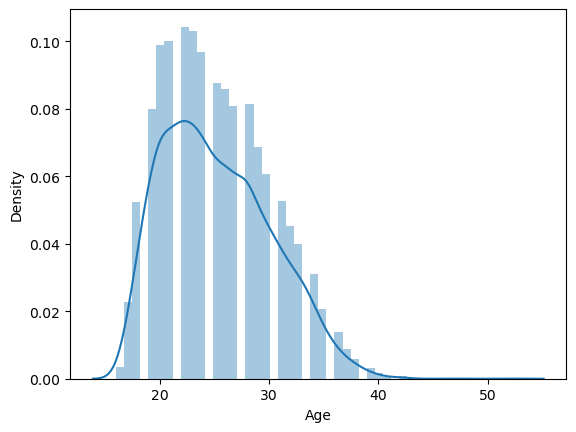

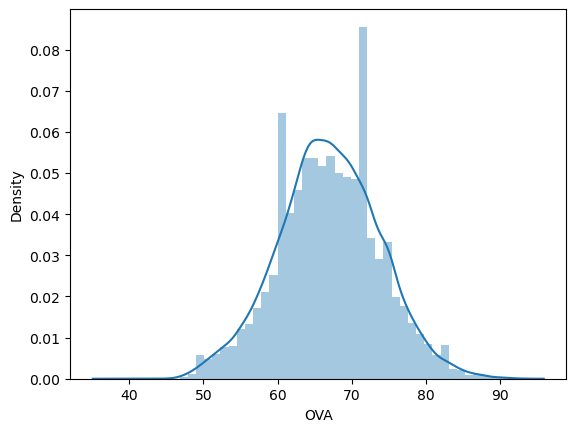

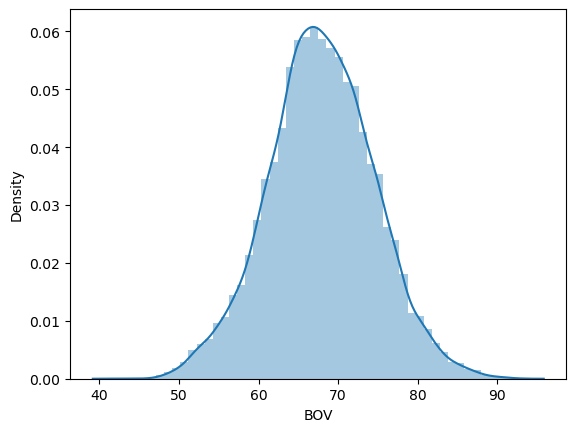

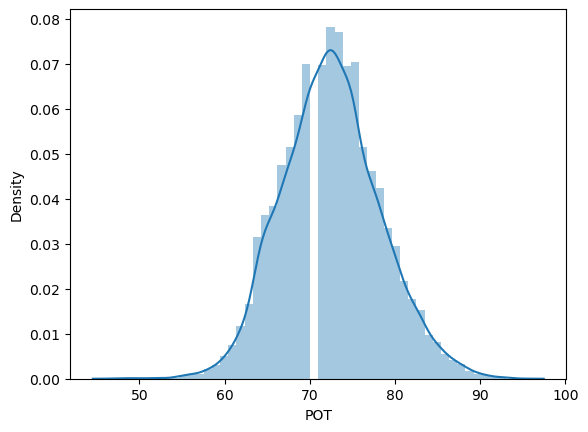

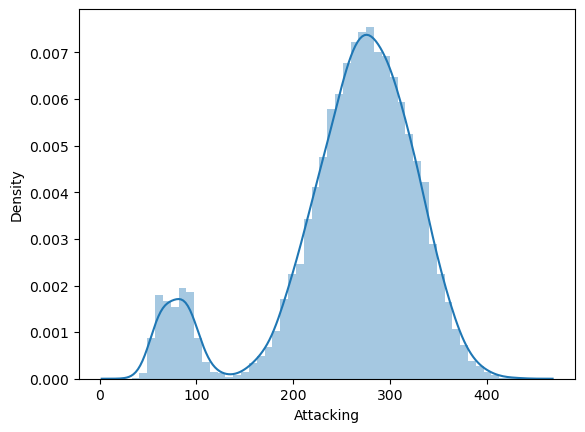

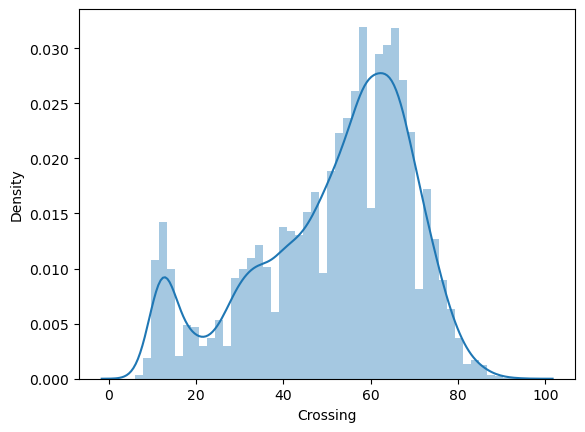

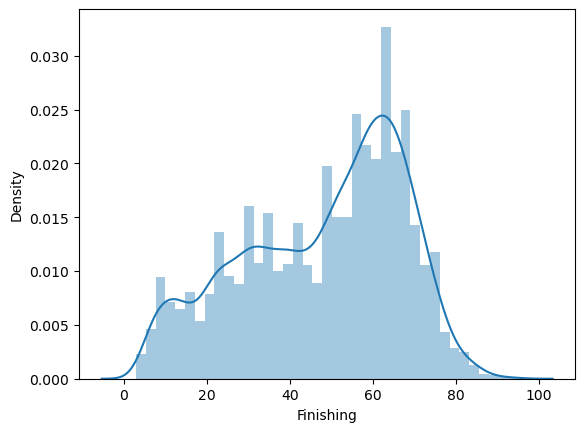

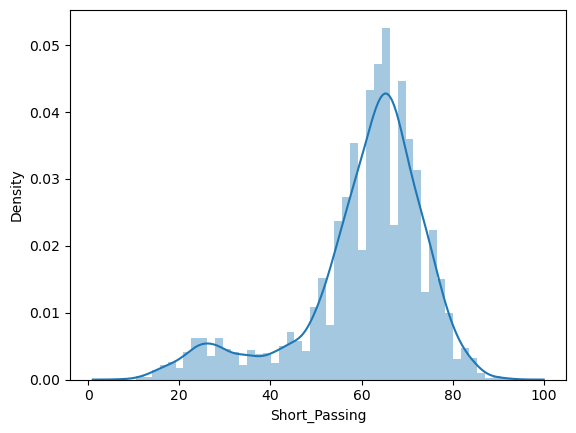

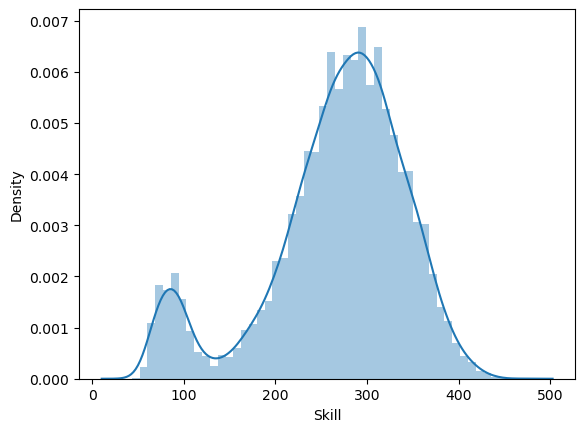

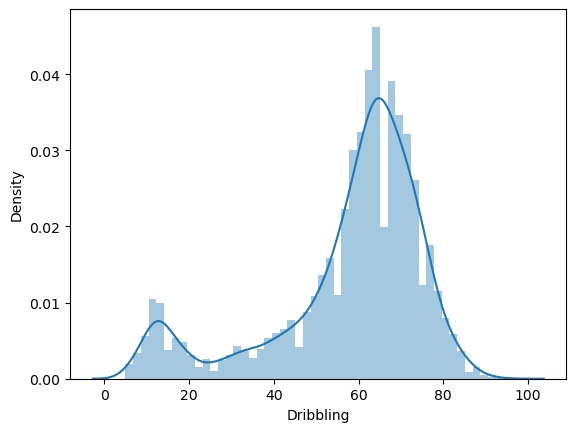

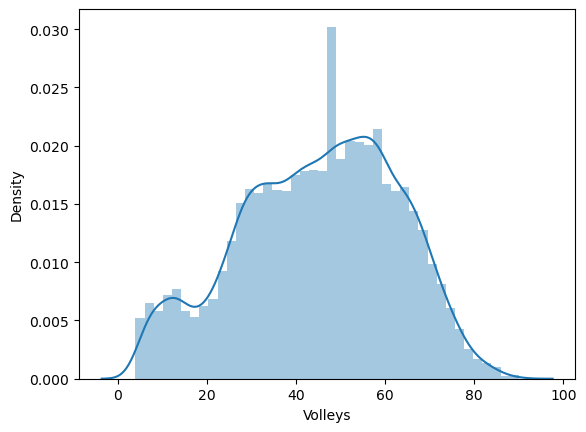

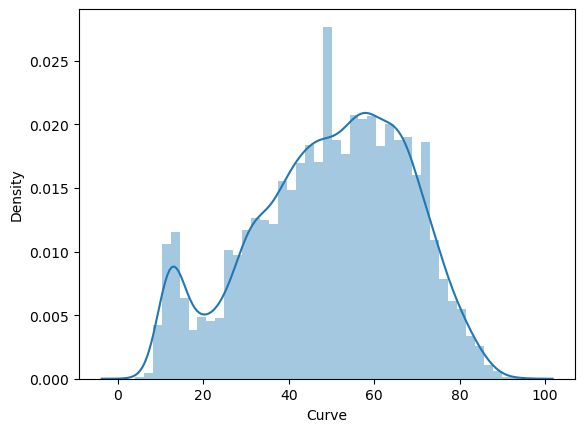

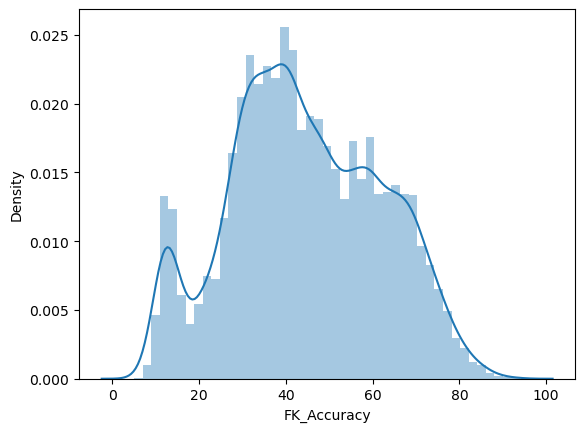

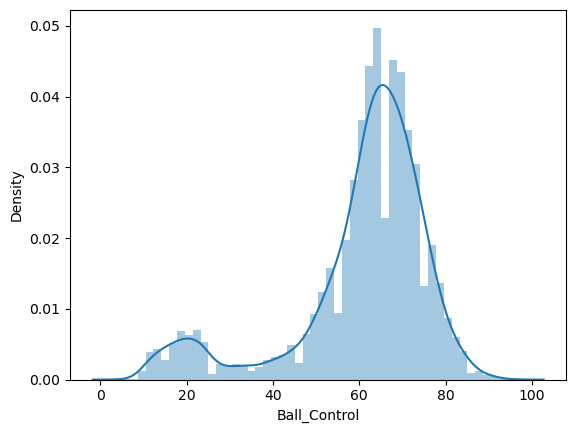

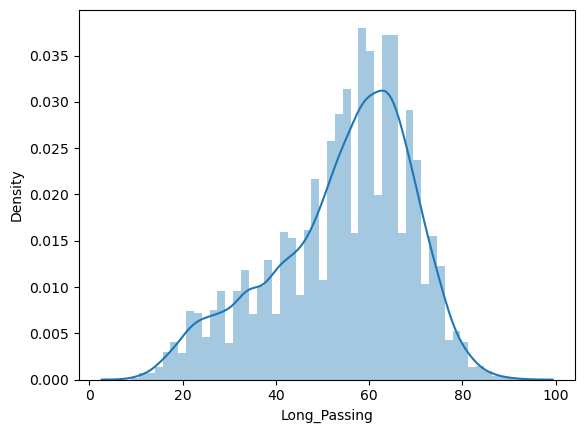

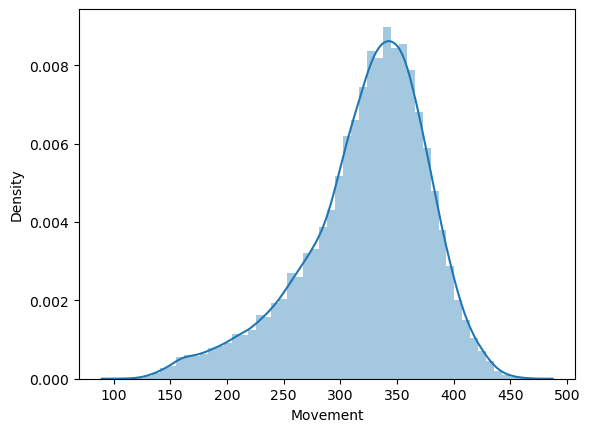

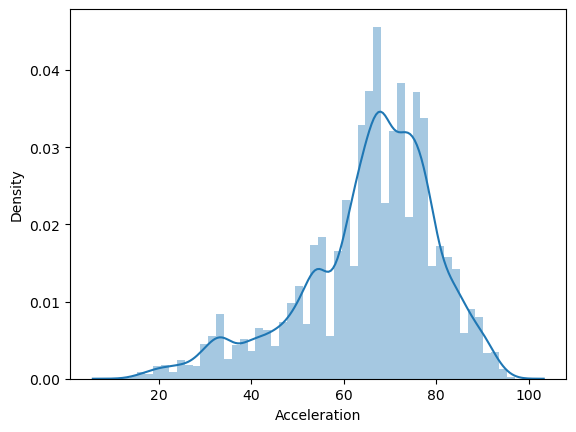

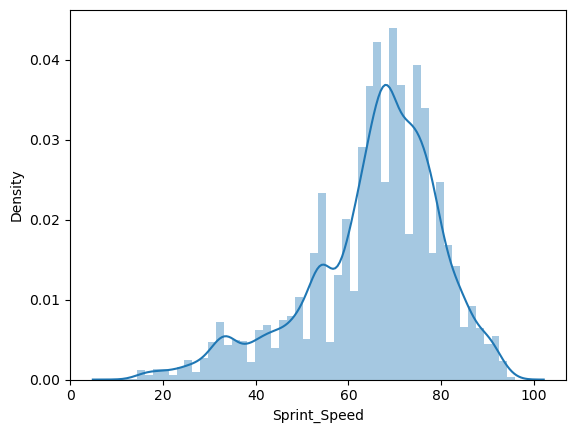

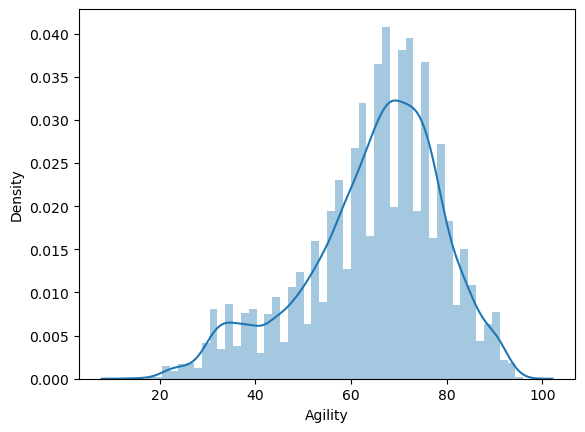

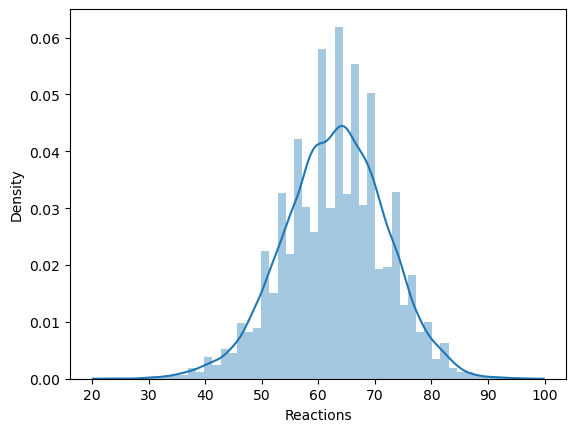

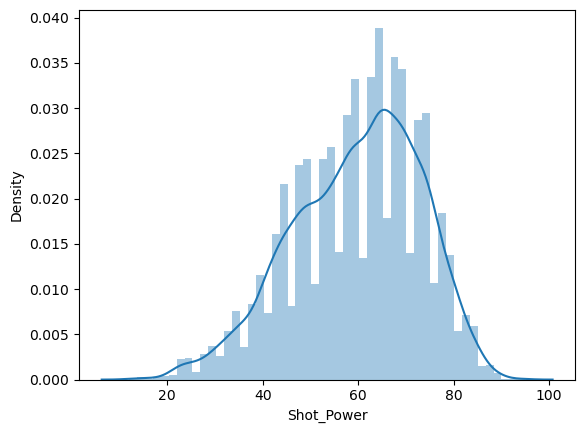

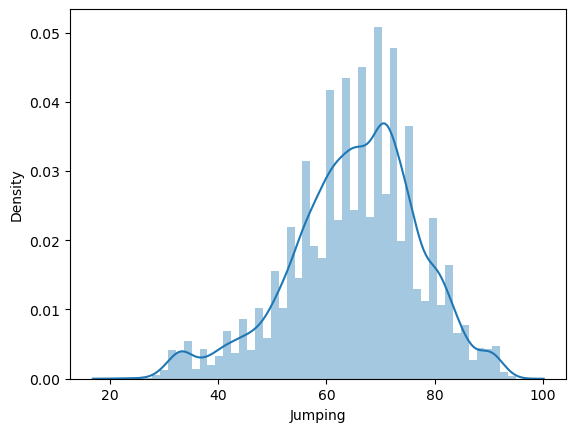

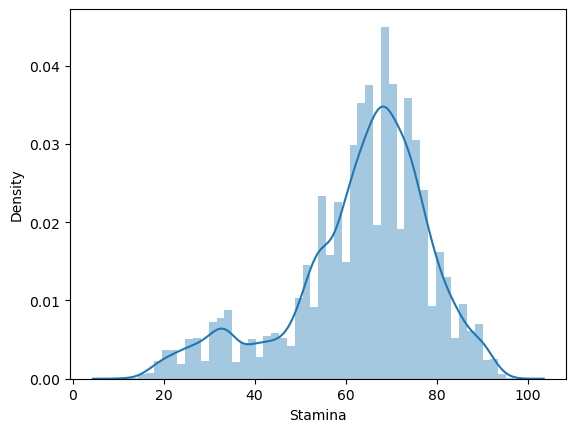

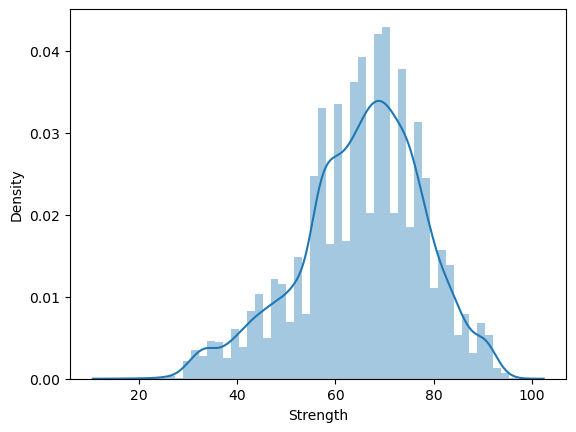

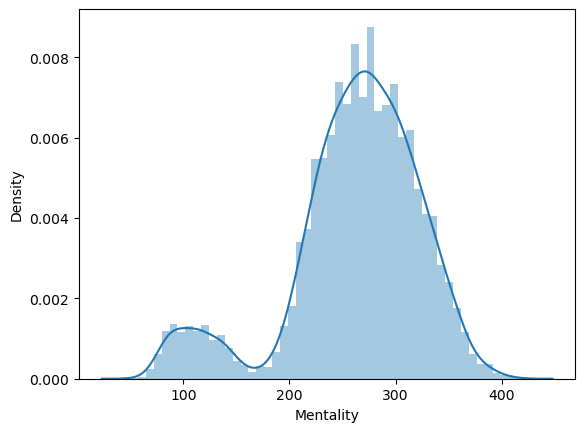

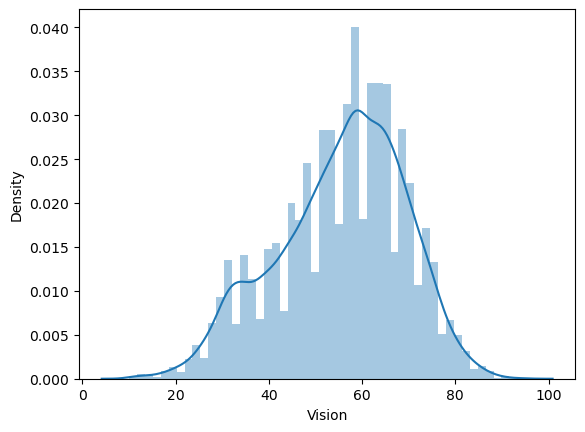

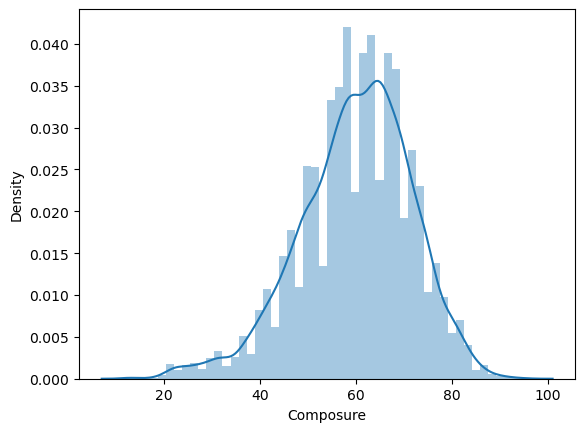

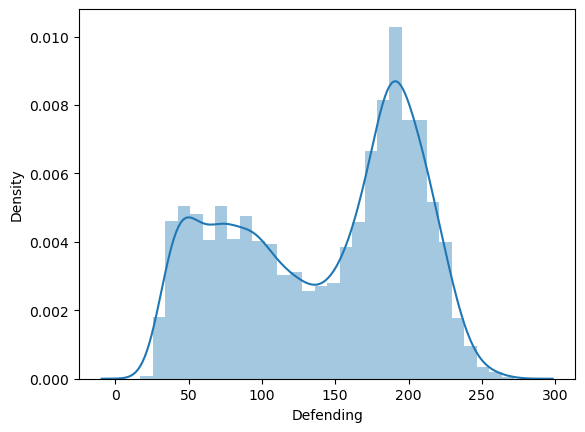

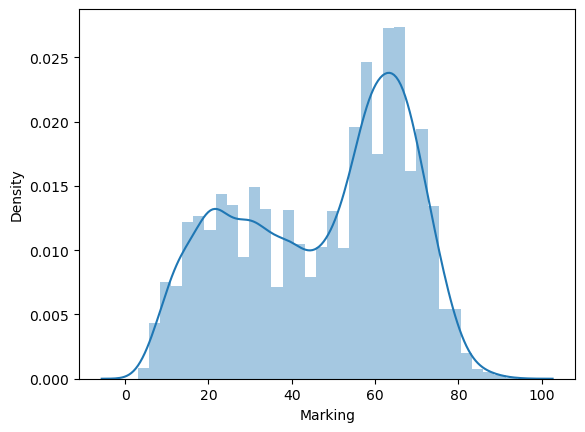

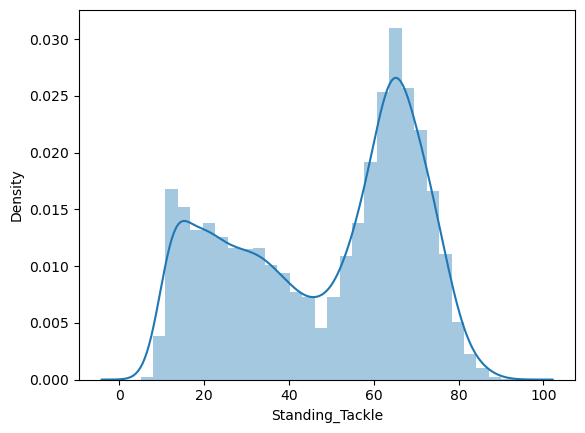

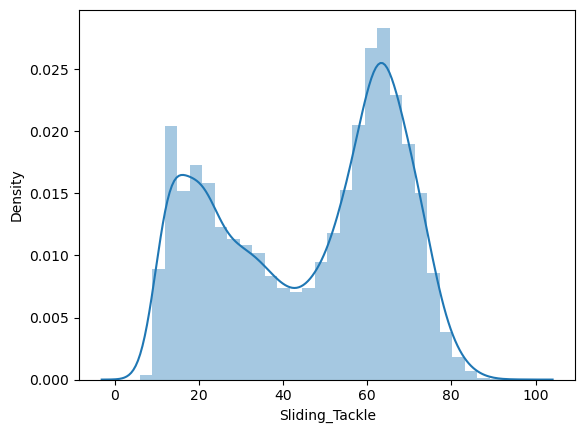

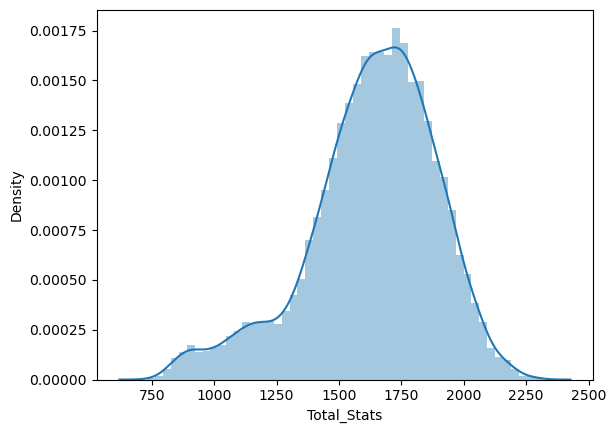

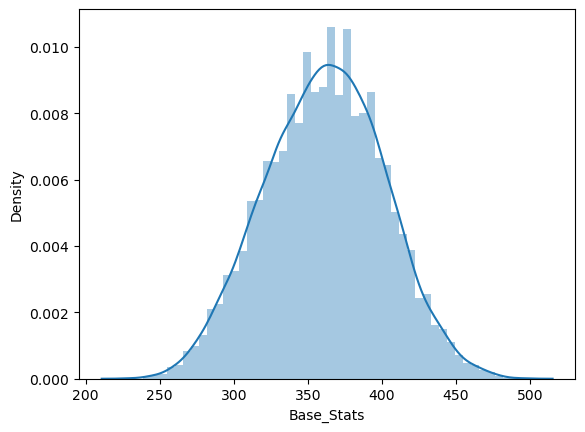

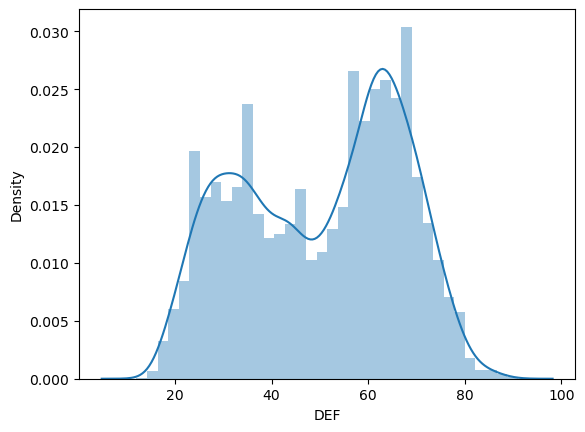

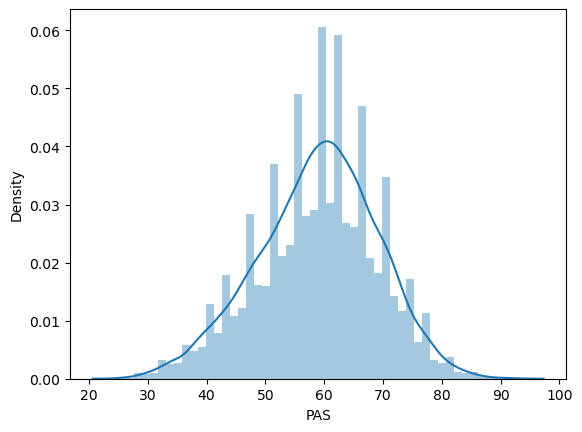

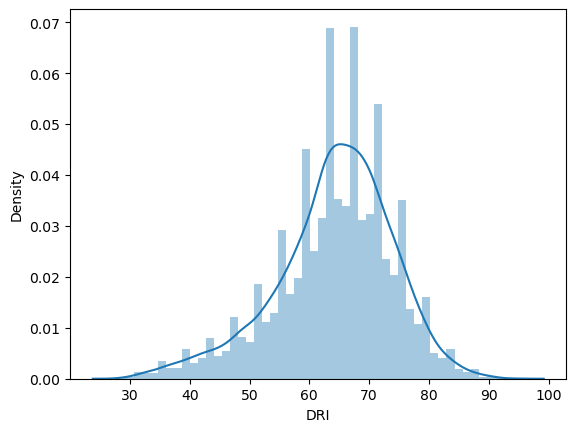

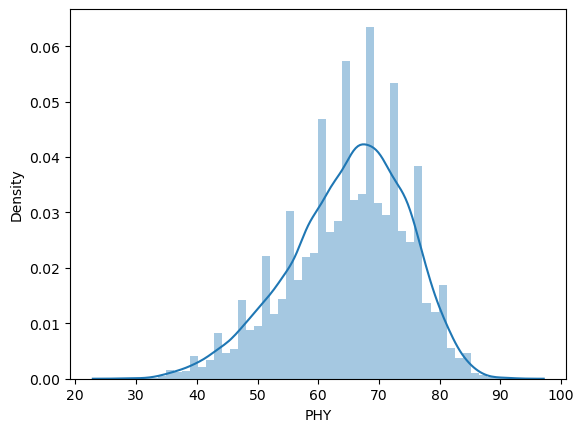

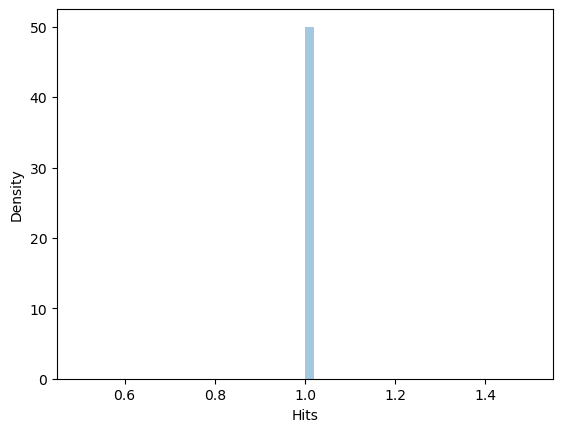

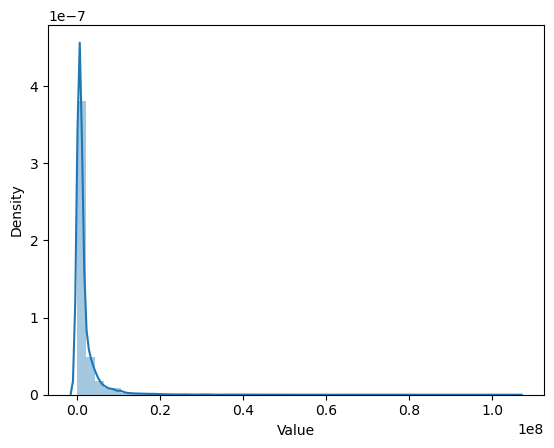

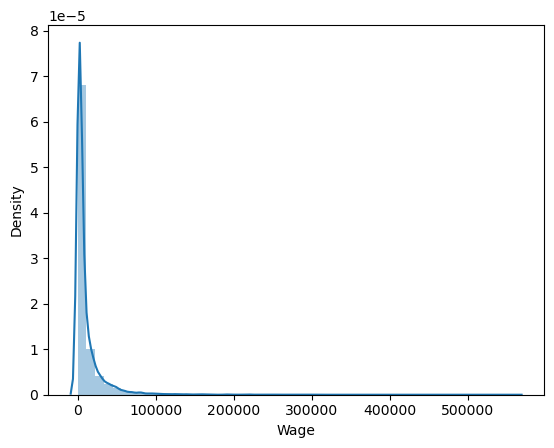

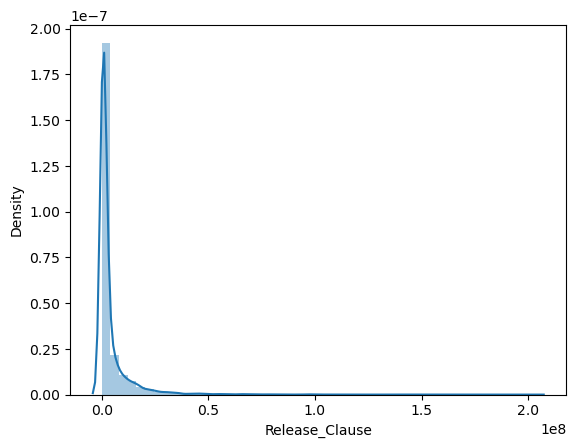

In [26]:
for column in fifa1_num.columns:
    sns.distplot(fifa1_num[column])
    plt.show()


## Checking histograms

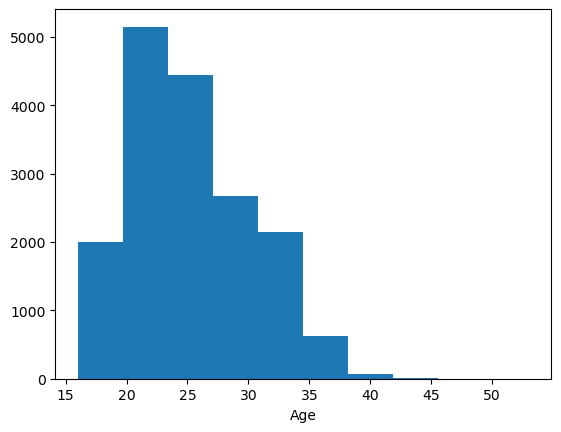

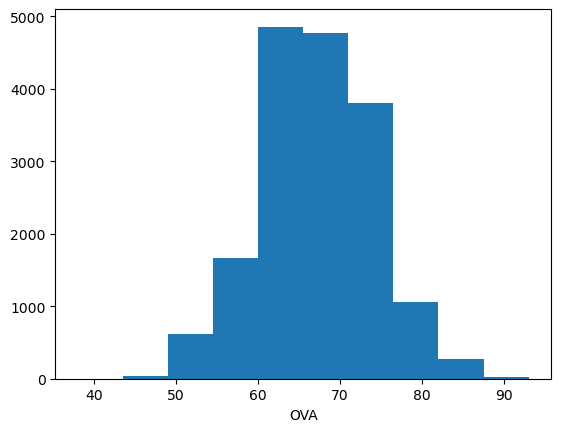

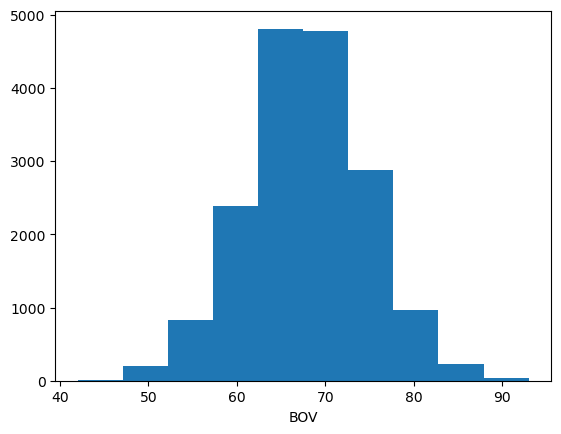

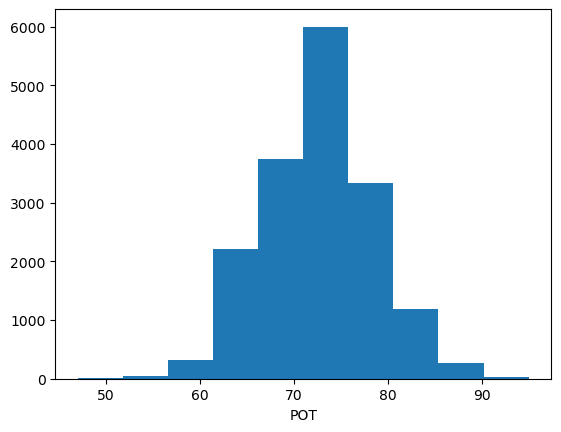

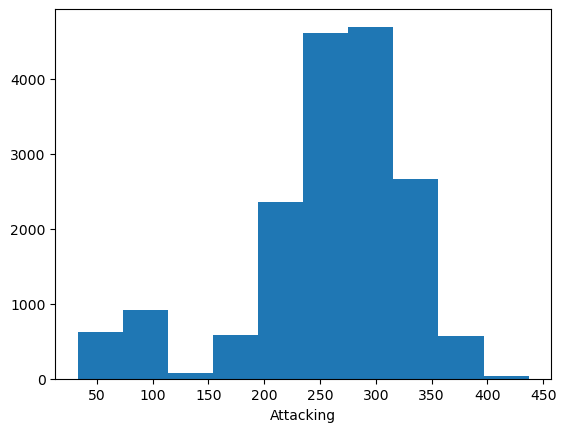

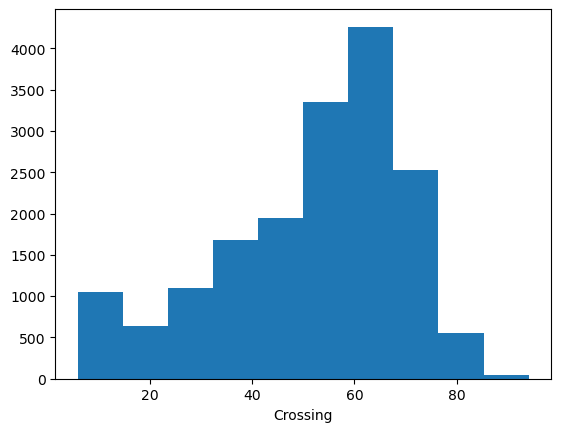

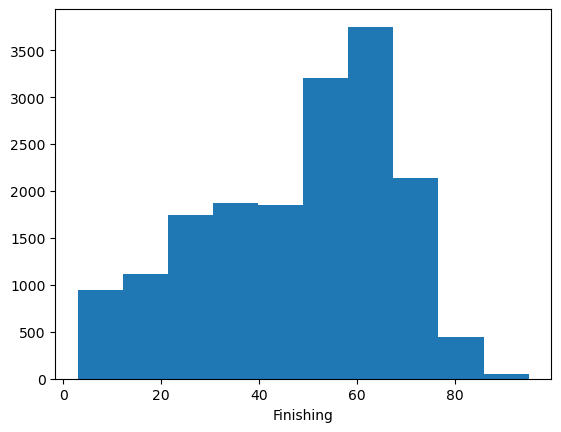

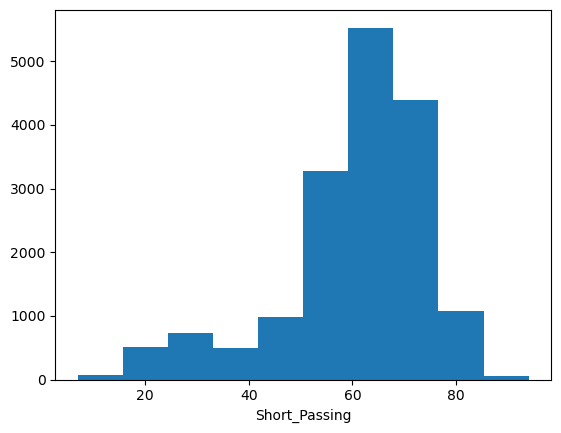

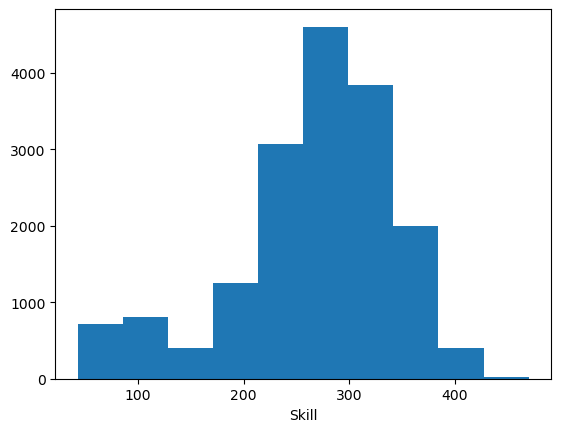

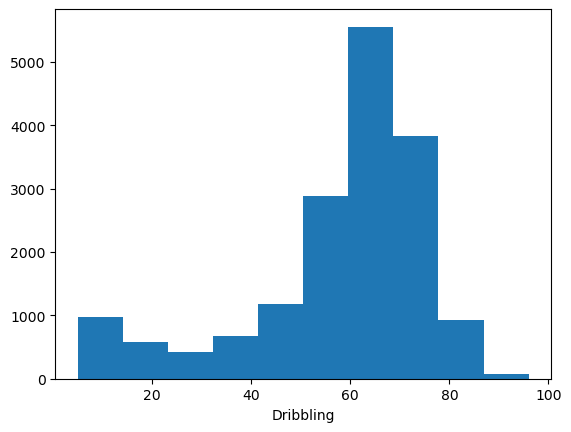

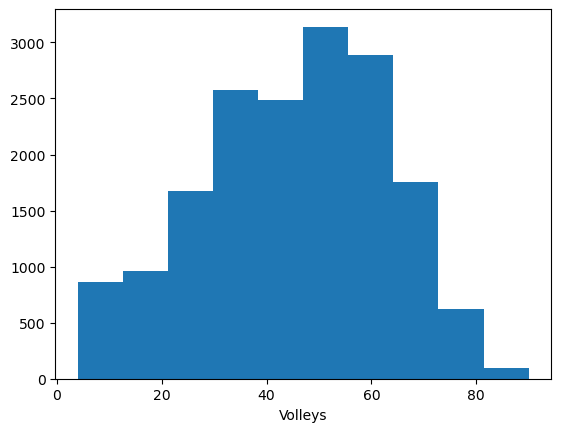

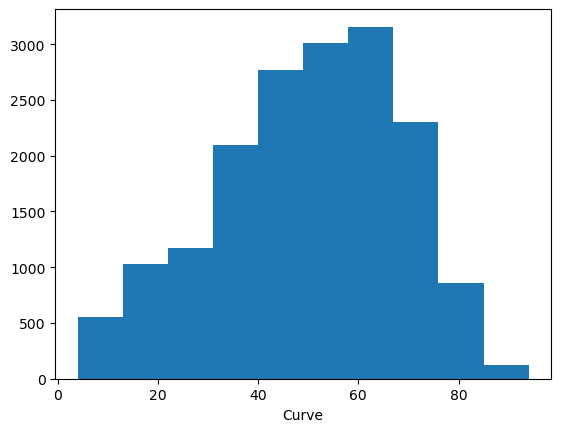

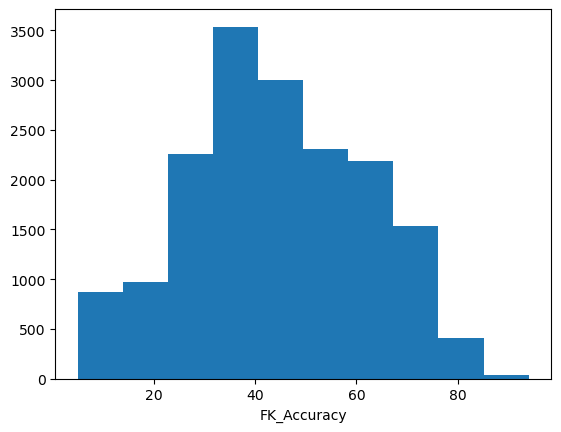

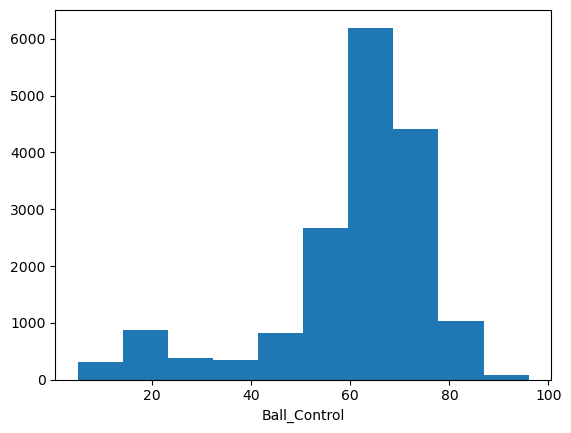

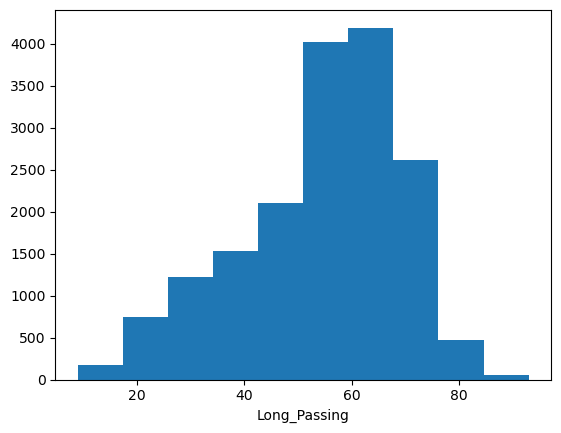

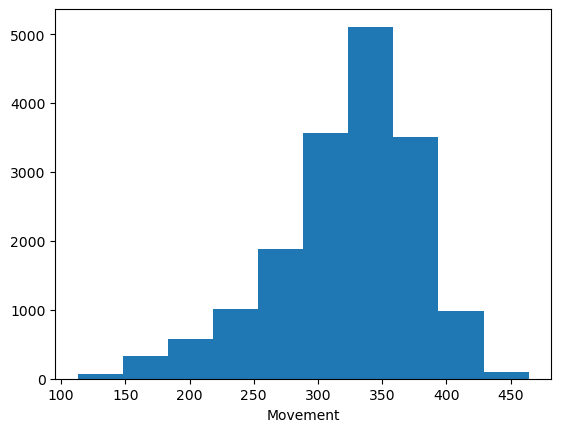

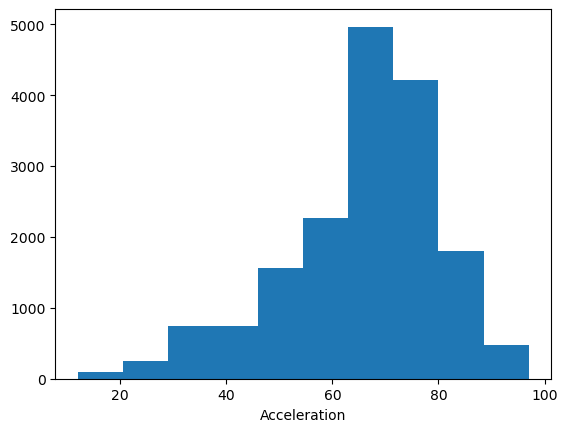

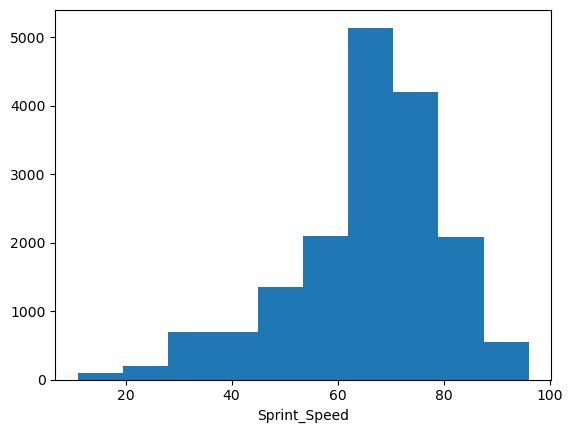

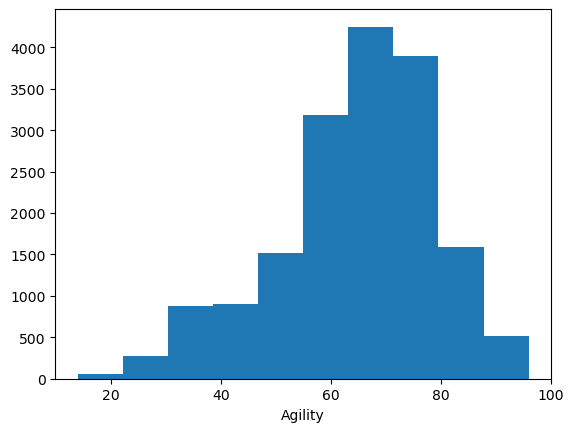

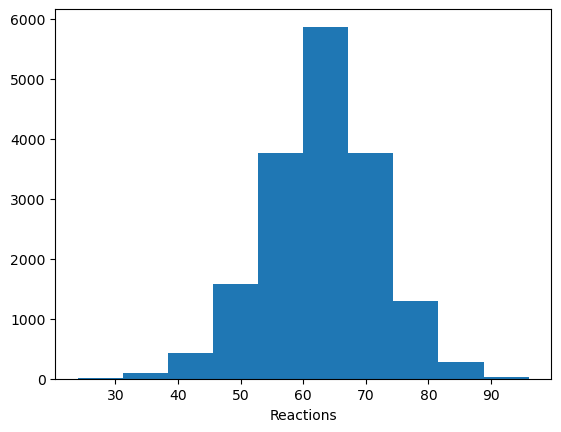

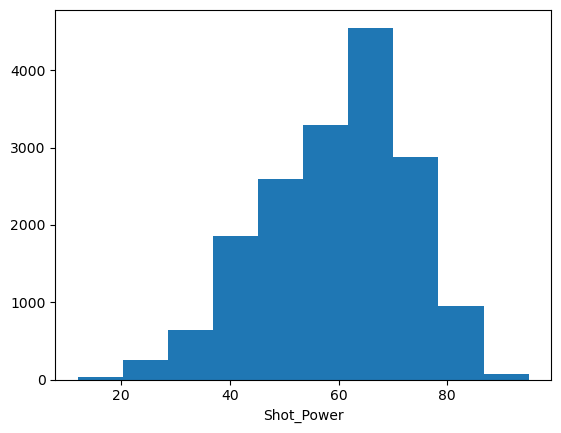

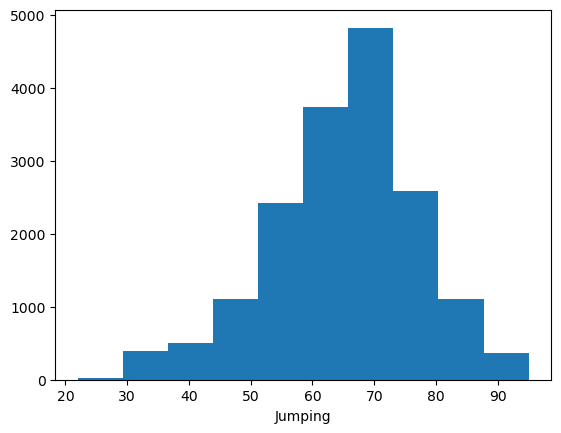

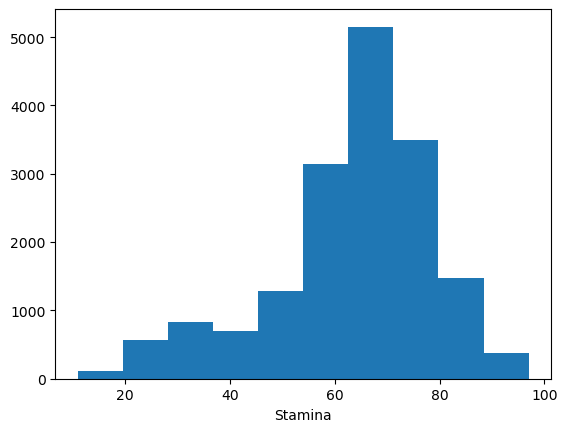

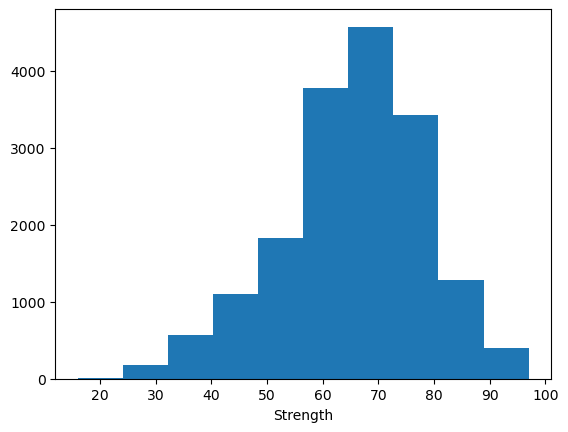

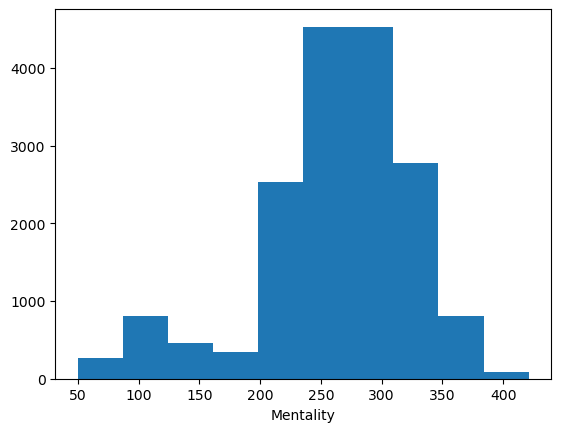

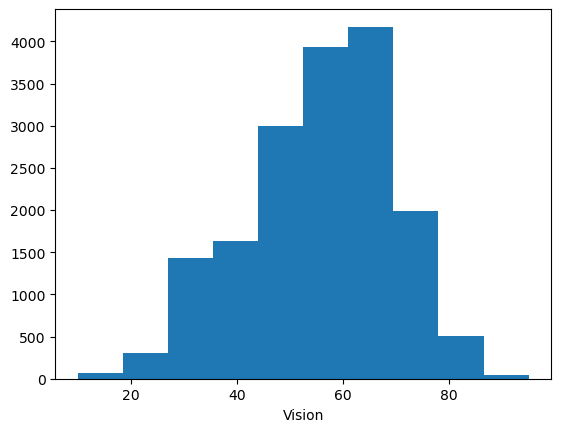

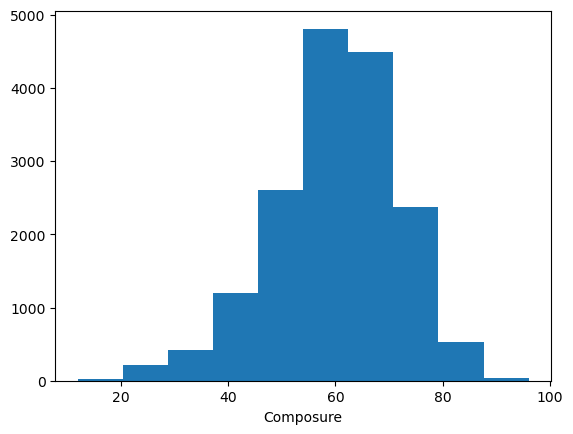

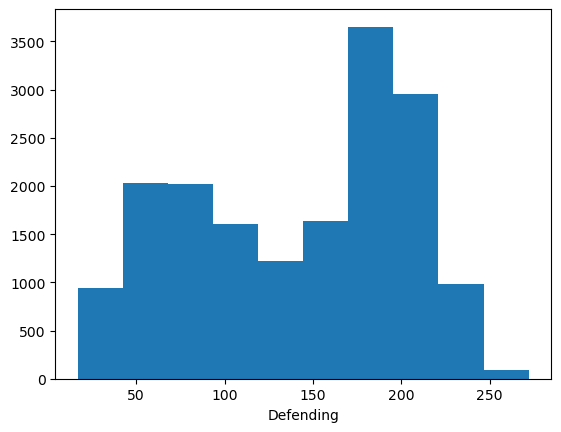

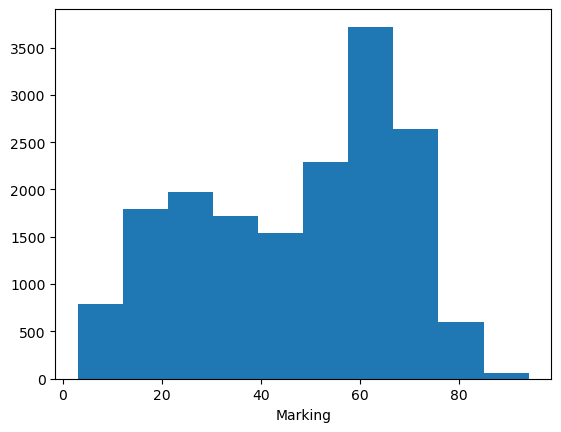

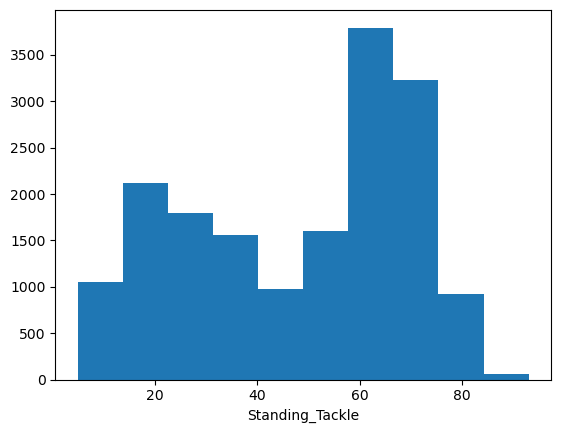

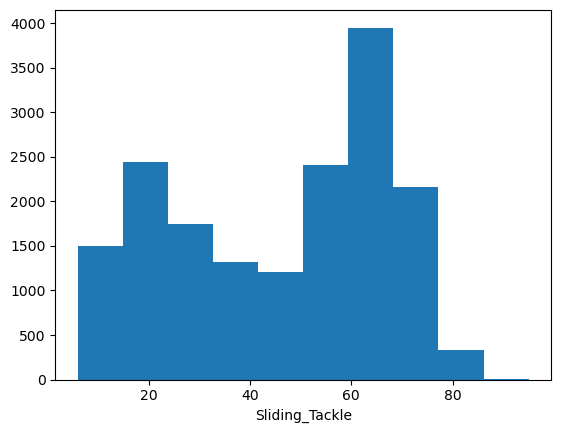

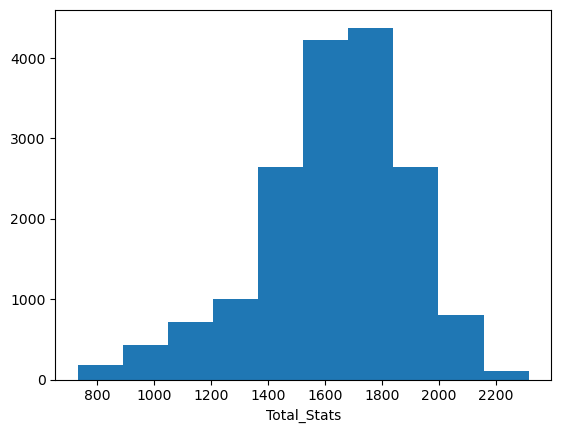

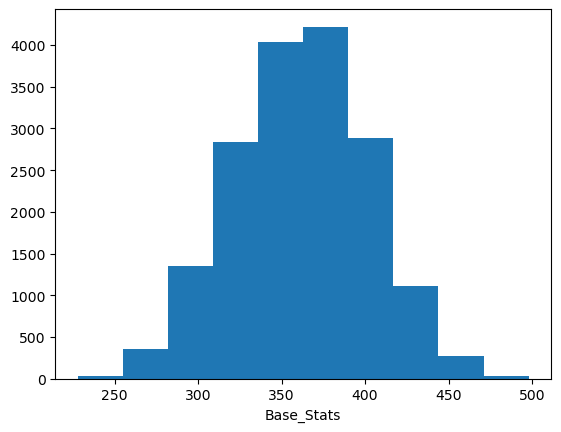

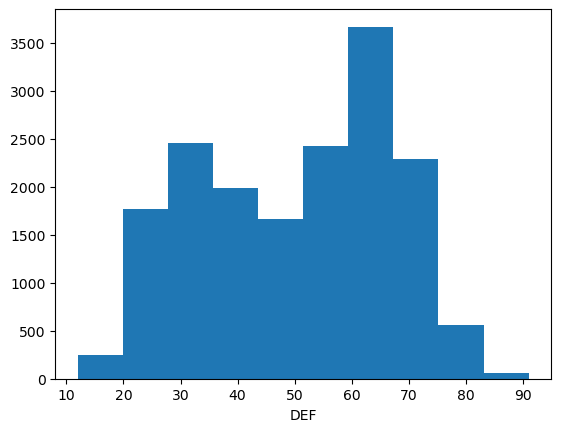

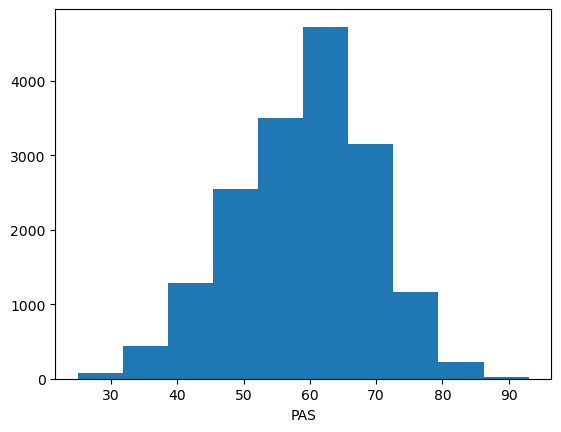

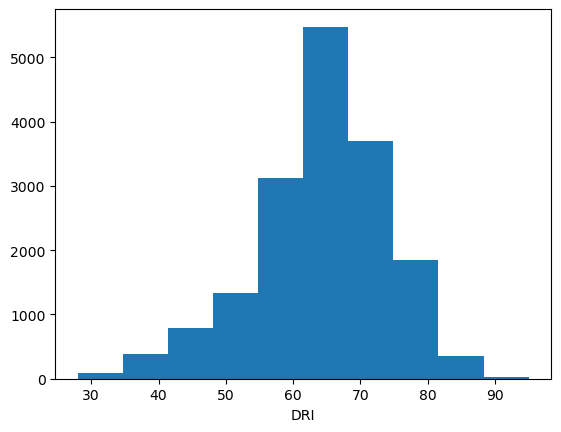

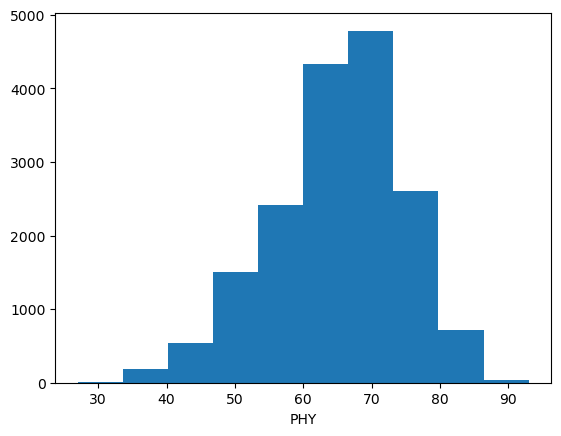

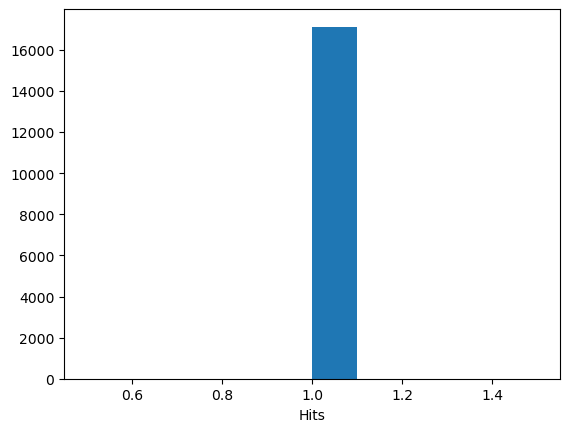

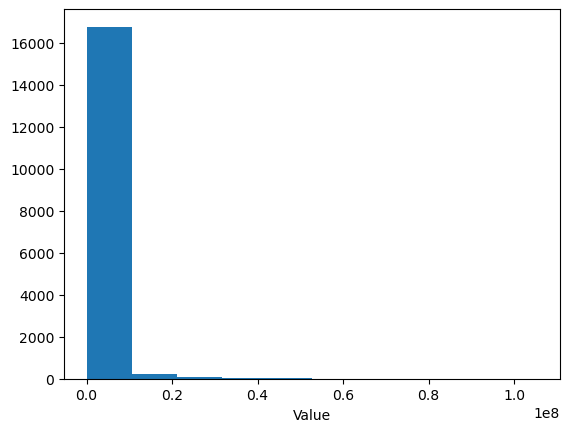

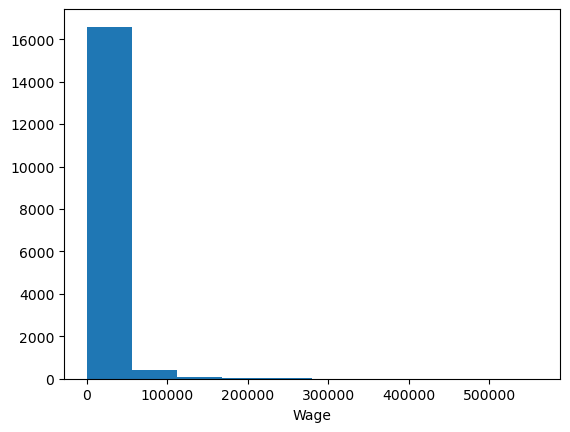

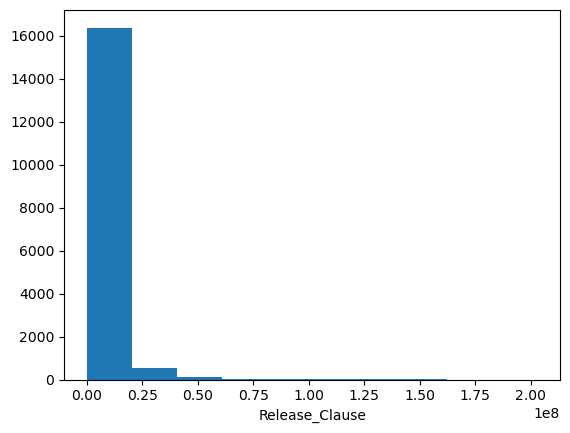

In [27]:
for column in fifa1_num.columns:
    plt.hist(fifa1_num[column])
    plt.xlabel(column)
    plt.show()

In [28]:
### Checking the pairplot

In [29]:
#sns.pairplot(fifa1_num)

### Check Outliers

In [30]:
fifa1_num.describe()

,Age,OVA,BOV,POT,Attacking,Crossing,Finishing,Short_Passing,Skill,Dribbling,Volleys,Curve,FK_Accuracy,Ball_Control,Long_Passing,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Shot_Power,Jumping,Stamina,Strength,Mentality,Vision,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Hits,Value,Wage,Release_Clause
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17067.000000,16702.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.0,1.712500e+04,17125.000000,1.712500e+04
mean,25.272934,66.965022,67.900204,72.489810,258.537752,51.621314,47.956672,60.507620,266.607591,57.846423,45.005742,49.574676,44.387270,60.642803,54.324321,322.693664,65.445898,65.443036,64.602273,62.924847,59.711416,65.170212,63.309606,65.308555,261.922803,55.443605,59.940965,141.469898,47.246949,48.279358,46.099725,1631.256175,361.372146,50.266102,58.926540,64.209869,64.910715,1.0,1.743266e+06,10532.928467,4.111806e+06
std,4.942665,6.864329,6.637538,5.769949,72.255687,17.875715,19.391547,13.960635,76.809344,18.047250,17.729483,18.188344,17.504128,15.873647,14.856911,54.933593,14.657889,14.437377,14.372443,9.037279,13.417931,11.918063,15.313272,12.627212,62.913935,13.730080,11.751111,61.595180,20.182548,21.483597,21.185154,260.357024,40.252290,16.853801,10.186728,9.832734,9.660260,0.0,3.795473e+06,21145.376646,9.736019e+06
min,16.000000,38.000000,42.000000,47.000000,33.000000,6.000000,3.000000,7.000000,43.000000,5.000000,4.000000,4.000000,5.000000,5.000000,9.000000,113.000000,12.000000,11.000000,14.000000,24.000000,12.000000,22.000000,11.000000,16.000000,50.000000,10.000000,12.000000,17.000000,3.000000,5.000000,6.000000,731.000000,228.000000,12.000000,25.000000,28.000000,27.000000,1.0,0.000000e+00,0.000000,0.000000e+00
25%,21.000000,62.000000,64.000000,69.000000,232.000000,41.000000,33.000000,56.000000,232.000000,53.000000,32.000000,37.000000,32.000000,57.000000,45.000000,294.000000,58.000000,59.000000,57.000000,57.000000,50.000000,58.000000,56.000000,58.000000,235.000000,47.000000,53.000000,84.000000,29.000000,28.000000,25.000000,1492.000000,333.000000,35.000000,52.000000,59.000000,59.000000,1.0,3.250000e+05,1000.000000,4.130000e+05
50%,25.000000,67.000000,68.000000,72.000000,271.000000,56.000000,52.000000,63.000000,279.000000,63.000000,46.000000,51.000000,43.000000,64.000000,57.000000,331.000000,68.000000,68.000000,67.000000,63.000000,61.000000,66.000000,66.000000,67.000000,269.000000,57.000000,61.000000,158.000000,52.000000,55.000000,52.000000,1659.000000,362.000000,53.000000,60.000000,65.000000,66.000000,1.0,6.750000e+05,3000.000000,1.100000e+06
75%,29.000000,72.000000,72.000000,76.000000,306.000000,65.000000,64.000000,69.000000,319.000000,70.000000,59.000000,64.000000,58.000000,70.000000,65.000000,360.000000,75.000000,75.000000,75.000000,69.000000,70.000000,73.000000,73.000000,74.000000,304.000000,65.000000,68.000000,194.000000,64.000000,66.000000,64.000000,1812.000000,390.000000,64.000000,66.000000,71.000000,72.000000,1.0,1.500000e+06,11000.000000,3.200000e+06
max,53.000000,93.000000,93.000000,95.000000,437.000000,94.000000,95.000000,94.000000,470.000000,96.000000,90.000000,94.000000,94.000000,96.000000,93.000000,464.000000,97.000000,96.000000,96.000000,96.000000,95.000000,95.000000,97.000000,97.000000,421.000000,95.000000,96.000000,272.000000,94.000000,93.000000,95.000000,2316.000000,498.000000,91.000000,93.000000,95.000000,93.000000,1.0,1.055000e+08,560000.000000,2.031000e+08


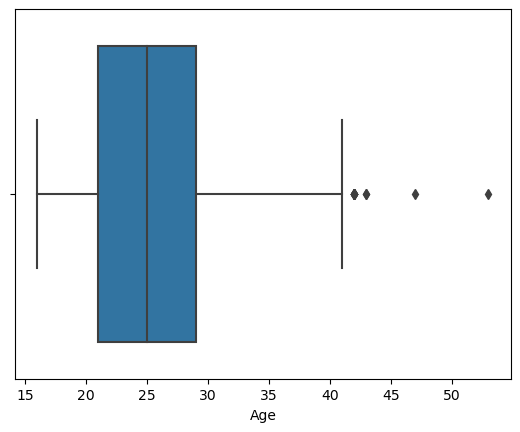

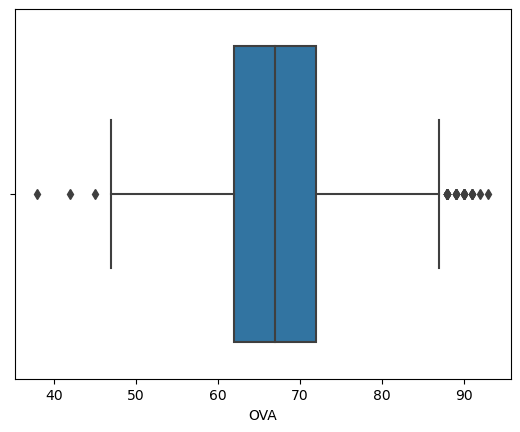

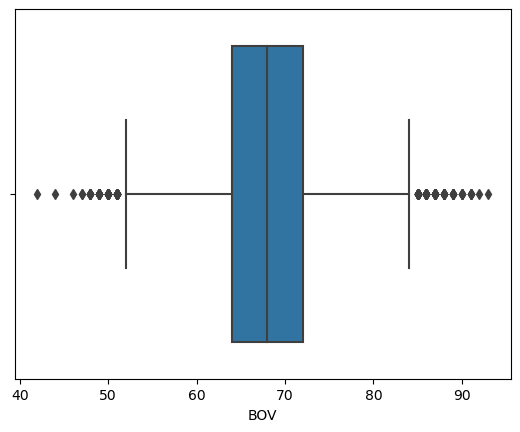

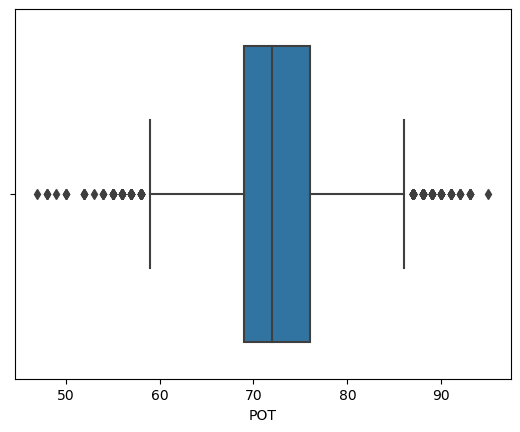

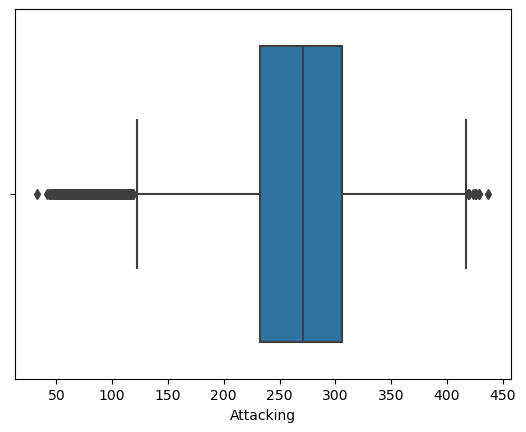

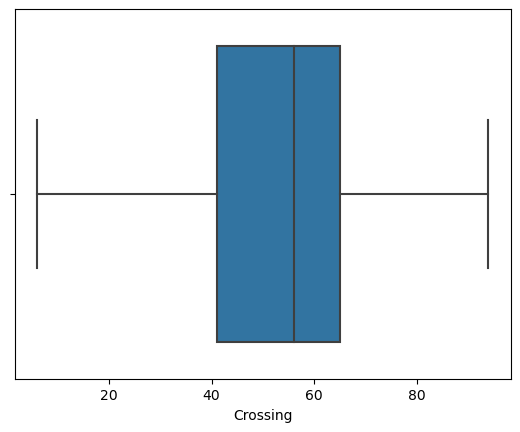

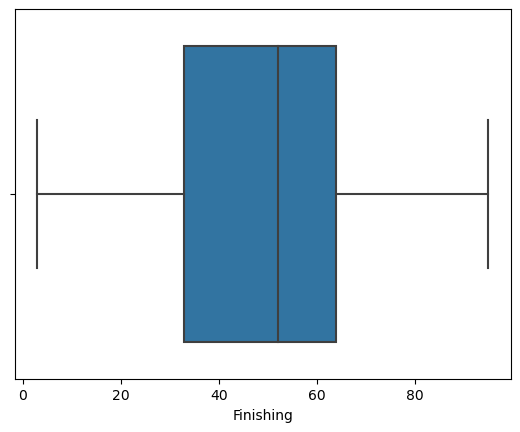

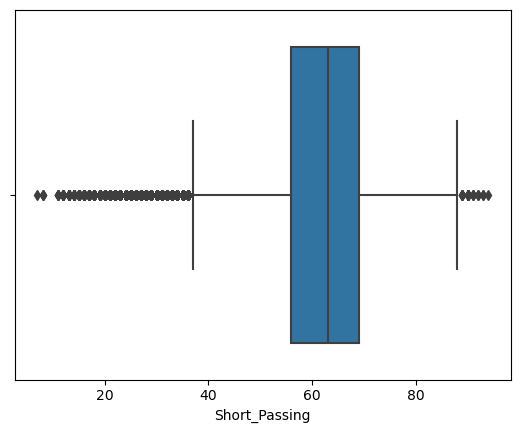

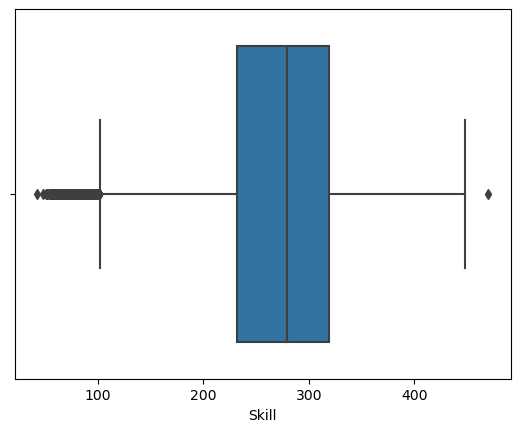

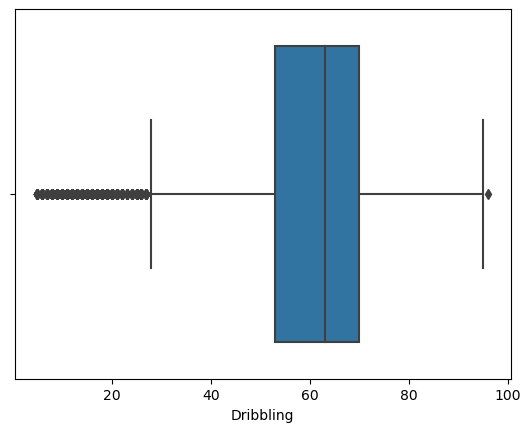

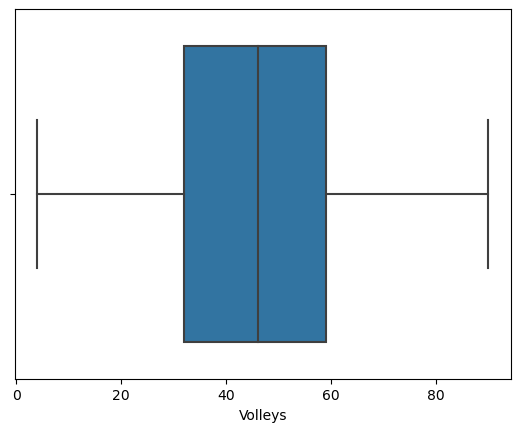

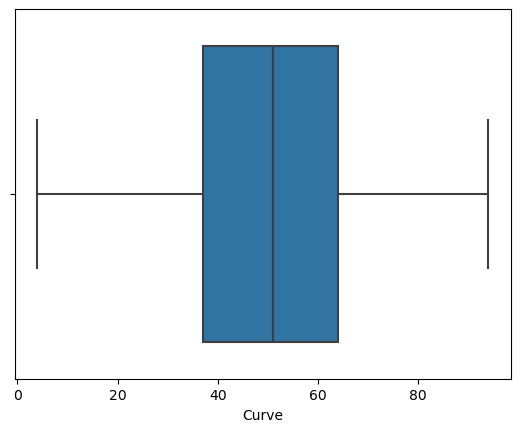

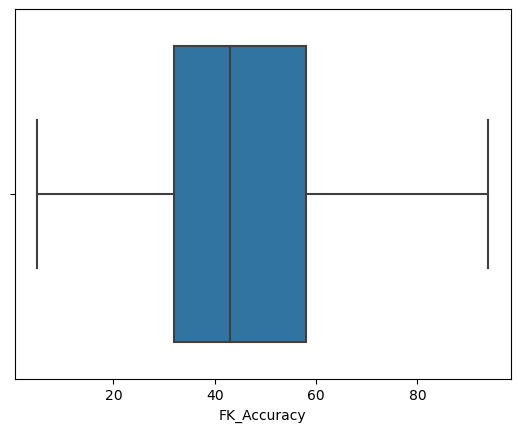

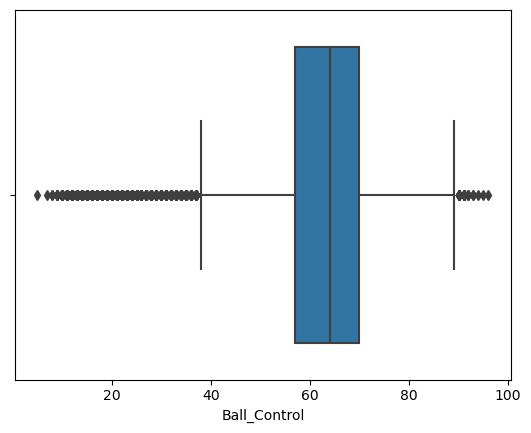

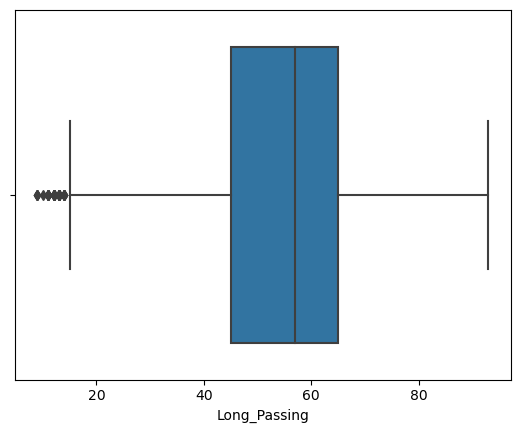

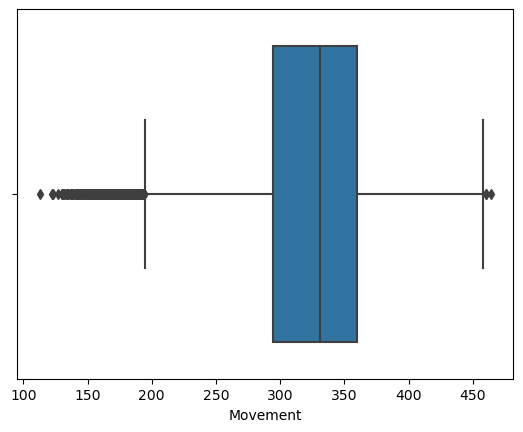

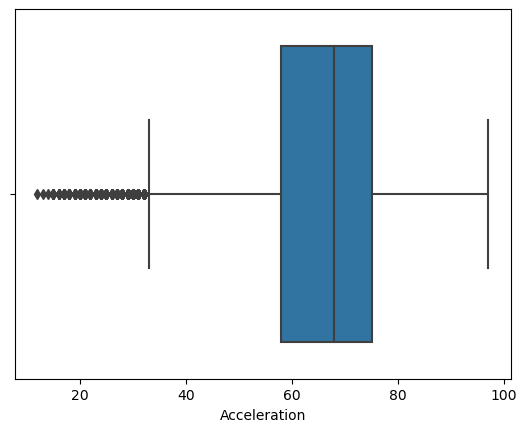

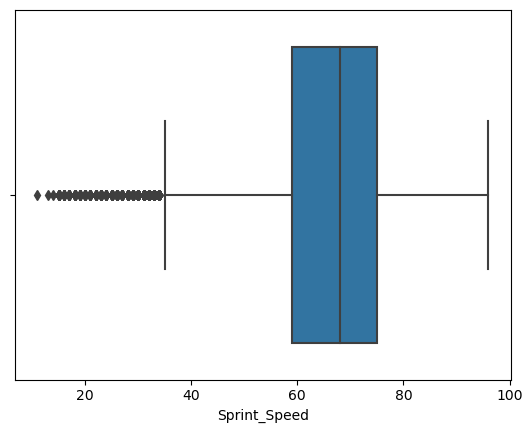

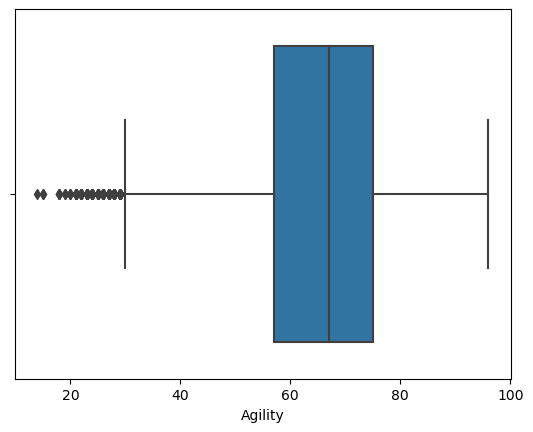

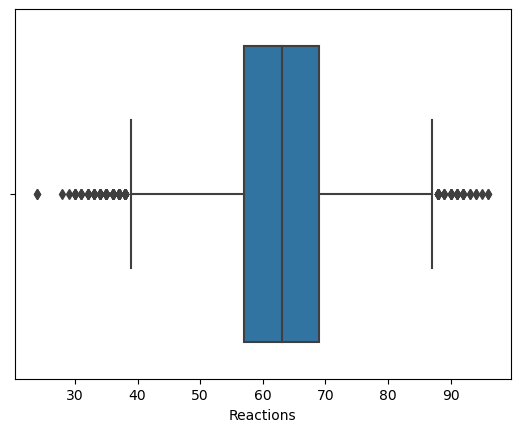

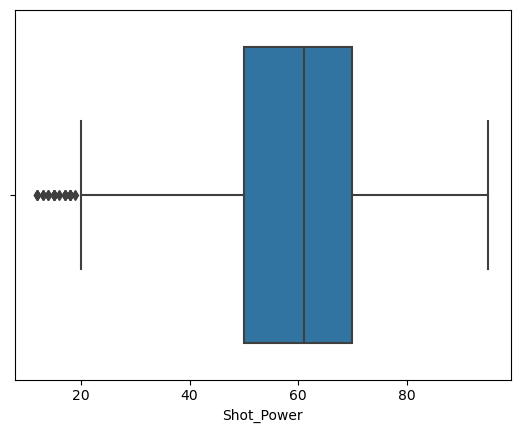

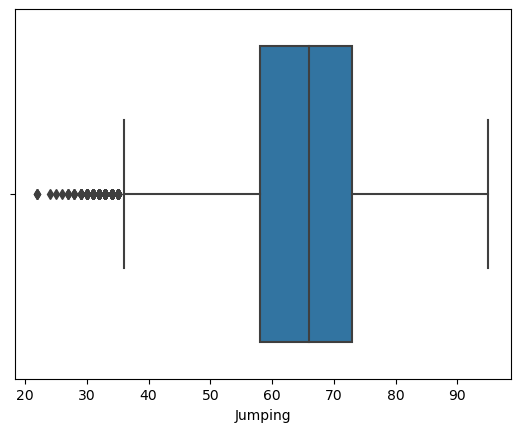

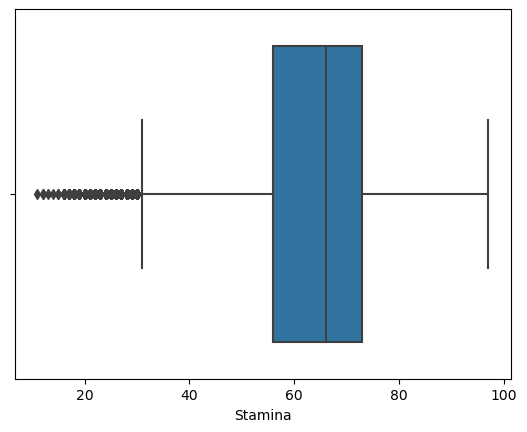

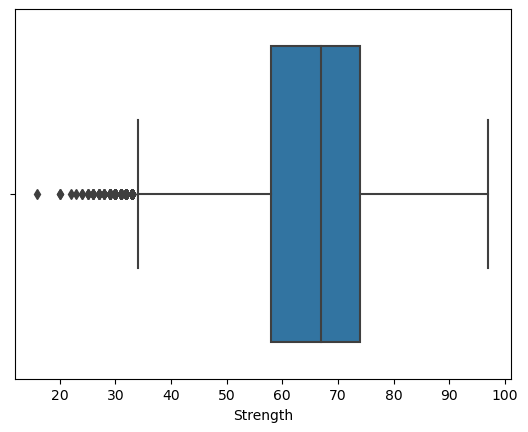

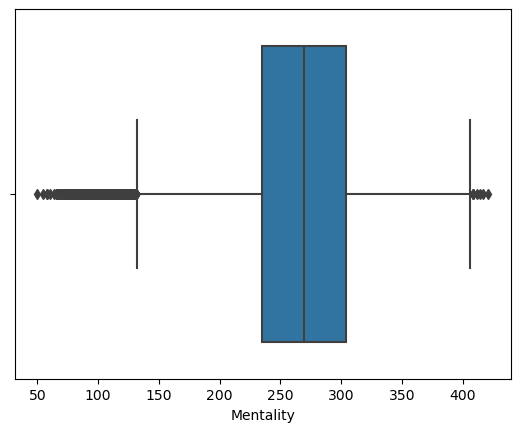

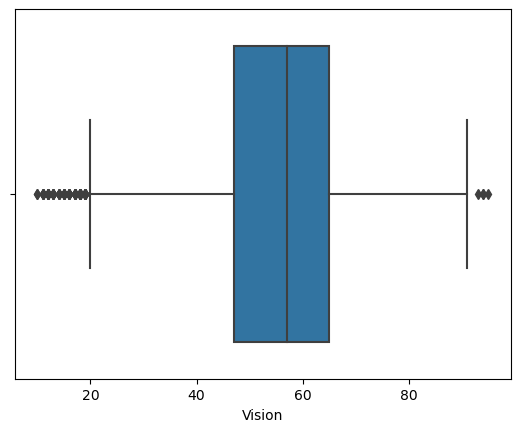

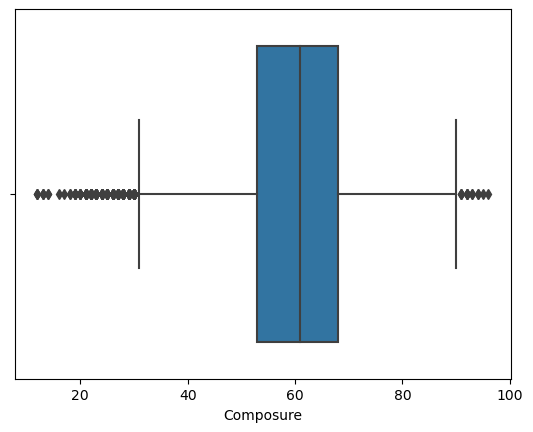

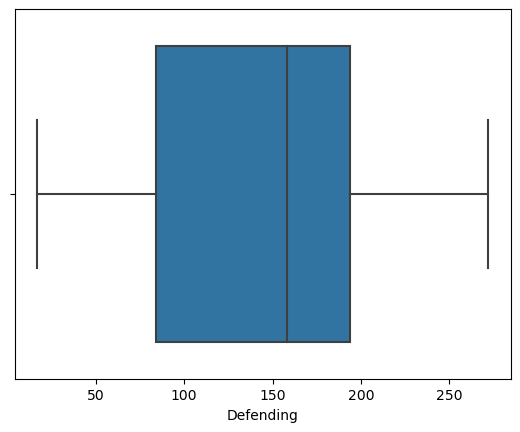

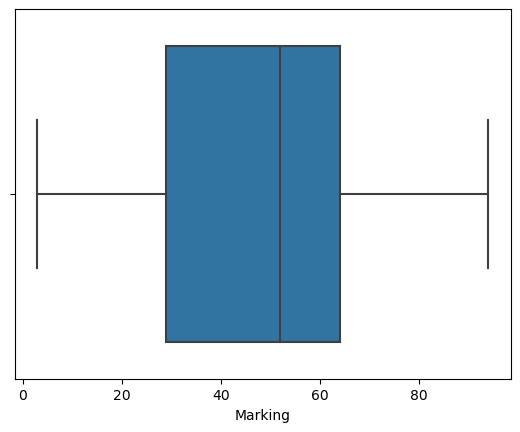

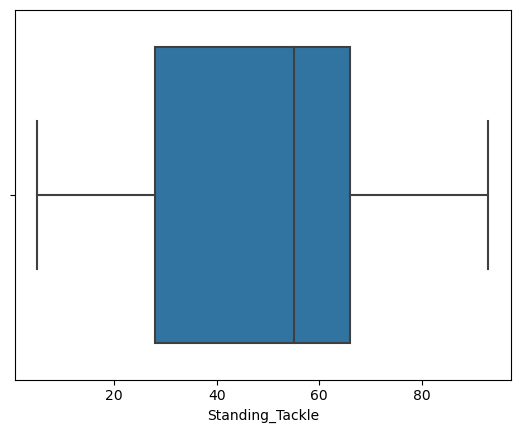

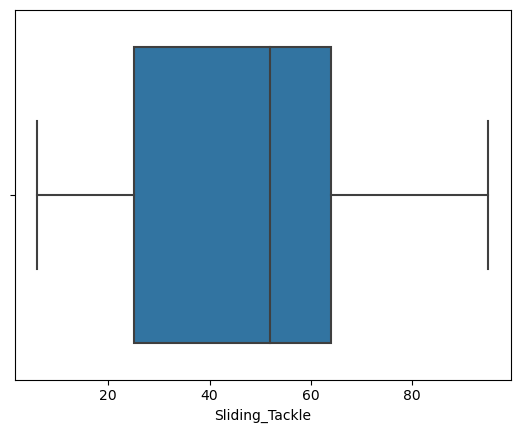

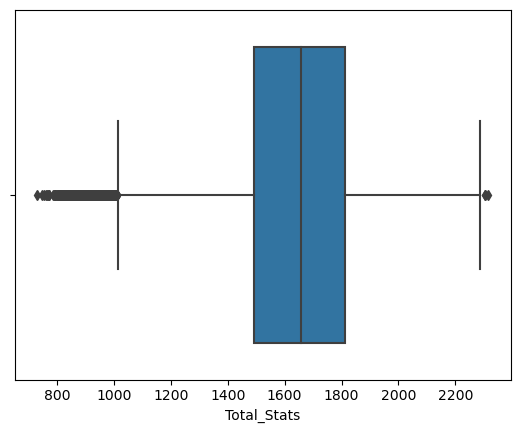

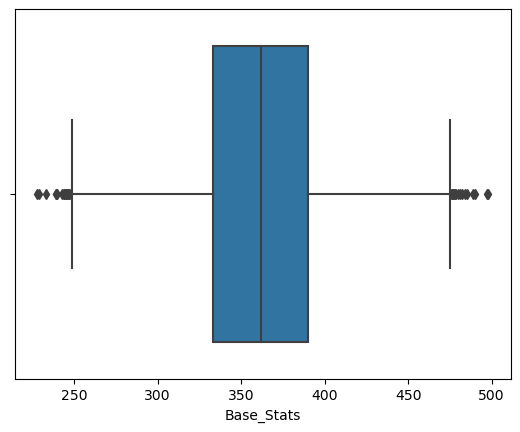

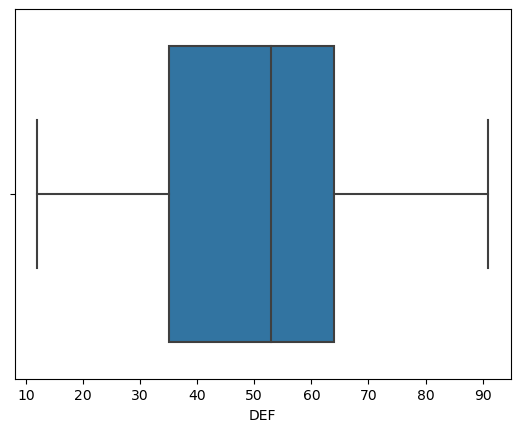

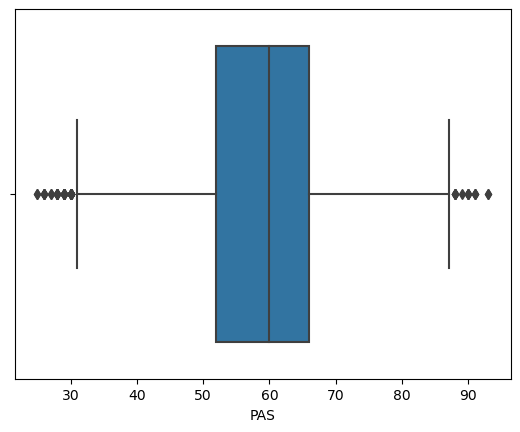

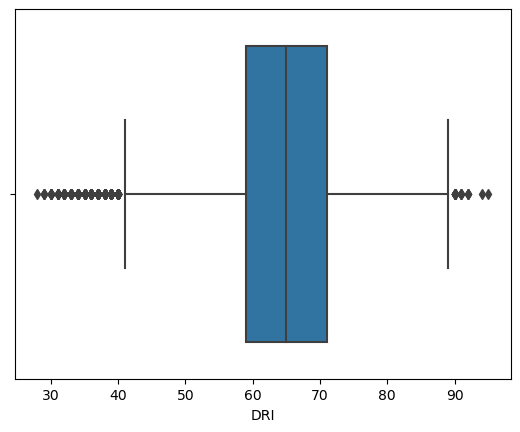

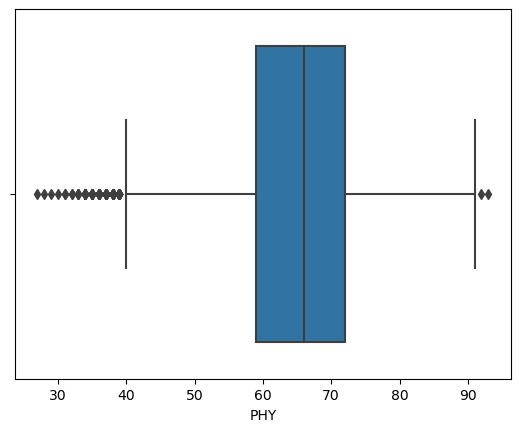

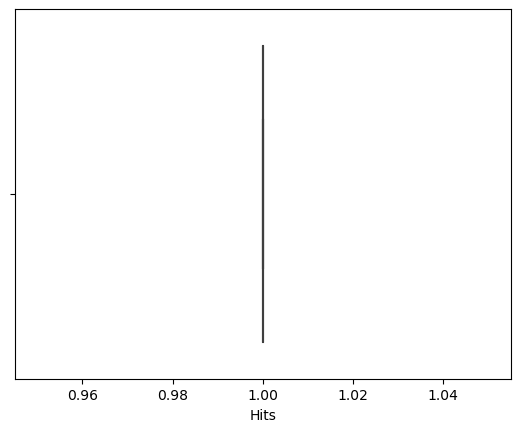

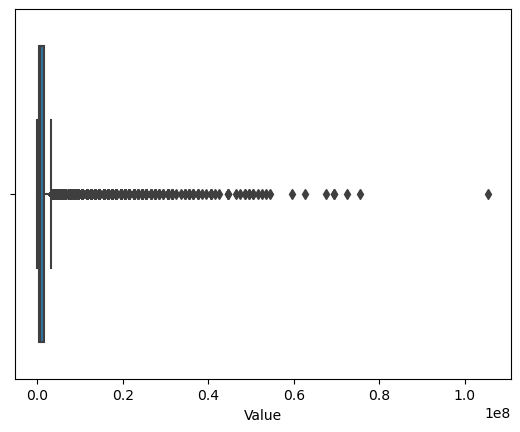

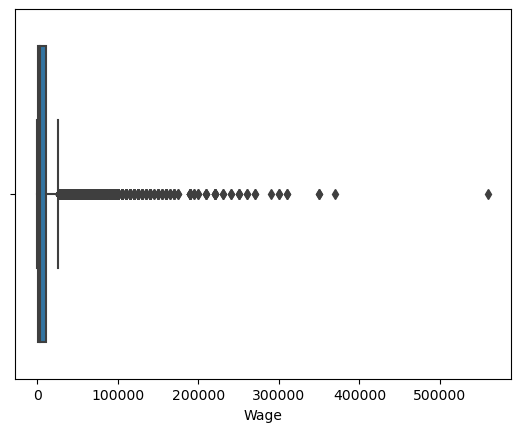

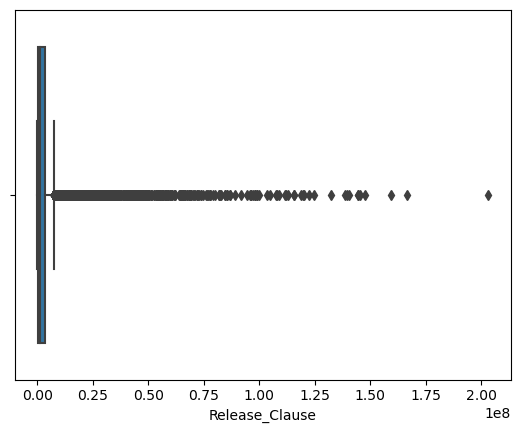

In [31]:
for column in fifa1_num.columns:
    sns.boxplot(fifa1_num[column])
    plt.show()

In [32]:
# Removing Rows(players) older than 30

#fifa1_num= fifa1_num[fifa1_num.Age<30]

In [33]:
fifa1_num.describe()

,Age,OVA,BOV,POT,Attacking,Crossing,Finishing,Short_Passing,Skill,Dribbling,Volleys,Curve,FK_Accuracy,Ball_Control,Long_Passing,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Shot_Power,Jumping,Stamina,Strength,Mentality,Vision,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Hits,Value,Wage,Release_Clause
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17067.000000,16702.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.0,1.712500e+04,17125.000000,1.712500e+04
mean,25.272934,66.965022,67.900204,72.489810,258.537752,51.621314,47.956672,60.507620,266.607591,57.846423,45.005742,49.574676,44.387270,60.642803,54.324321,322.693664,65.445898,65.443036,64.602273,62.924847,59.711416,65.170212,63.309606,65.308555,261.922803,55.443605,59.940965,141.469898,47.246949,48.279358,46.099725,1631.256175,361.372146,50.266102,58.926540,64.209869,64.910715,1.0,1.743266e+06,10532.928467,4.111806e+06
std,4.942665,6.864329,6.637538,5.769949,72.255687,17.875715,19.391547,13.960635,76.809344,18.047250,17.729483,18.188344,17.504128,15.873647,14.856911,54.933593,14.657889,14.437377,14.372443,9.037279,13.417931,11.918063,15.313272,12.627212,62.913935,13.730080,11.751111,61.595180,20.182548,21.483597,21.185154,260.357024,40.252290,16.853801,10.186728,9.832734,9.660260,0.0,3.795473e+06,21145.376646,9.736019e+06
min,16.000000,38.000000,42.000000,47.000000,33.000000,6.000000,3.000000,7.000000,43.000000,5.000000,4.000000,4.000000,5.000000,5.000000,9.000000,113.000000,12.000000,11.000000,14.000000,24.000000,12.000000,22.000000,11.000000,16.000000,50.000000,10.000000,12.000000,17.000000,3.000000,5.000000,6.000000,731.000000,228.000000,12.000000,25.000000,28.000000,27.000000,1.0,0.000000e+00,0.000000,0.000000e+00
25%,21.000000,62.000000,64.000000,69.000000,232.000000,41.000000,33.000000,56.000000,232.000000,53.000000,32.000000,37.000000,32.000000,57.000000,45.000000,294.000000,58.000000,59.000000,57.000000,57.000000,50.000000,58.000000,56.000000,58.000000,235.000000,47.000000,53.000000,84.000000,29.000000,28.000000,25.000000,1492.000000,333.000000,35.000000,52.000000,59.000000,59.000000,1.0,3.250000e+05,1000.000000,4.130000e+05
50%,25.000000,67.000000,68.000000,72.000000,271.000000,56.000000,52.000000,63.000000,279.000000,63.000000,46.000000,51.000000,43.000000,64.000000,57.000000,331.000000,68.000000,68.000000,67.000000,63.000000,61.000000,66.000000,66.000000,67.000000,269.000000,57.000000,61.000000,158.000000,52.000000,55.000000,52.000000,1659.000000,362.000000,53.000000,60.000000,65.000000,66.000000,1.0,6.750000e+05,3000.000000,1.100000e+06
75%,29.000000,72.000000,72.000000,76.000000,306.000000,65.000000,64.000000,69.000000,319.000000,70.000000,59.000000,64.000000,58.000000,70.000000,65.000000,360.000000,75.000000,75.000000,75.000000,69.000000,70.000000,73.000000,73.000000,74.000000,304.000000,65.000000,68.000000,194.000000,64.000000,66.000000,64.000000,1812.000000,390.000000,64.000000,66.000000,71.000000,72.000000,1.0,1.500000e+06,11000.000000,3.200000e+06
max,53.000000,93.000000,93.000000,95.000000,437.000000,94.000000,95.000000,94.000000,470.000000,96.000000,90.000000,94.000000,94.000000,96.000000,93.000000,464.000000,97.000000,96.000000,96.000000,96.000000,95.000000,95.000000,97.000000,97.000000,421.000000,95.000000,96.000000,272.000000,94.000000,93.000000,95.000000,2316.000000,498.000000,91.000000,93.000000,95.000000,93.000000,1.0,1.055000e+08,560000.000000,2.031000e+08


In [34]:
fifa1_num.shape

(17125, 41)

In [35]:
#Droping Hits cuz it is just irrelevant
fifa1_num= fifa1_num.drop(['Hits'], axis=1)
fifa1_num.head()

,Age,OVA,BOV,POT,Attacking,Crossing,Finishing,Short_Passing,Skill,Dribbling,Volleys,Curve,FK_Accuracy,Ball_Control,Long_Passing,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Shot_Power,Jumping,Stamina,Strength,Mentality,Vision,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage,Release_Clause
0,33,69,71,69,313,75,50,71,338,73,58.0,65.0,60,71,69,347,68,74,68.0,69,74,68.0,69,68,320,66.0,NaN,208,70,69,69.0,1929,408,68,70,71,69,625000.0,7000.0,0.0
1,37,71,70,71,337,68,64,76,369,69,68.0,79.0,79,71,71,305,56,50,62.0,65,75,54.0,64,60,362,73.0,79.0,153,70,43,40.0,1906,385,58,73,69,63,600000.0,7000.0,1100000.0
2,33,71,71,71,337,80,64,77,387,79,75.0,84.0,77,78,69,295,48,42,71.0,59,72,58.0,29,56,317,74.0,NaN,99,35,34,30.0,1770,354,36,76,77,52,1100000.0,15000.0,0.0
3,36,68,70,82,264,54,70,80,255,68,NaN,NaN,46,77,64,176,59,62,NaN,55,63,NaN,51,66,271,NaN,NaN,75,34,41,NaN,1348,369,47,66,69,60,0.0,0.0,0.0
4,36,81,82,81,367,75,69,90,408,85,79.0,80.0,70,90,83,346,61,56,79.0,75,67,40.0,58,62,370,93.0,89.0,181,68,57,56.0,2014,420,63,85,85,59,5500000.0,12000.0,7200000.0


In [36]:
#Removing players with OVA below the lower limit
#fifa1_num= fifa1_num[fifa1_num.OVA>61]

In [37]:
#Removing players with BOV below the lower limit
#fifa1_num= fifa1_num[fifa1_num.BOV>63]

### Checking POT outliers

In [38]:
#Defining iqr for POT
iqr = np.percentile(fifa1_num['POT'],75) - np.percentile(fifa1_num['POT'],25)
iqr

7.0

In [39]:
#Defining the Limits for POT
upper_limit = np.percentile(fifa1_num['POT'],75) + 1.5*iqr
lower_limit = np.percentile(fifa1_num['POT'],25) - 1.5*iqr
upper_limit, lower_limit

(86.5, 58.5)

In [40]:
#how many rows are the outliers in POT
len(fifa1_num[(fifa1_num['POT']<lower_limit) & (fifa1_num['POT']>upper_limit)])

0

## checking the multicollinearity between the features

In [41]:
# look at correlations between columns

fifa1_num_corr = fifa1_num.corr()
fifa1_num_corr = round(fifa1_num_corr,2)
fifa1_num_corr

,Age,OVA,BOV,POT,Attacking,Crossing,Finishing,Short_Passing,Skill,Dribbling,Volleys,Curve,FK_Accuracy,Ball_Control,Long_Passing,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Shot_Power,Jumping,Stamina,Strength,Mentality,Vision,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage,Release_Clause
Age,1.00,0.52,0.46,-0.24,0.18,0.15,0.11,0.18,0.17,0.04,0.19,0.18,0.22,0.12,0.22,-0.06,-0.19,-0.18,-0.04,0.50,0.30,0.20,0.07,0.35,0.27,0.24,0.42,0.11,0.16,0.11,0.09,0.28,0.41,0.22,0.40,0.24,0.44,0.08,0.20,0.07
OVA,0.52,1.00,0.99,0.59,0.43,0.39,0.30,0.49,0.44,0.35,0.36,0.40,0.37,0.43,0.48,0.30,0.14,0.15,0.23,0.87,0.53,0.26,0.34,0.34,0.50,0.51,0.71,0.25,0.29,0.24,0.21,0.61,0.83,0.34,0.70,0.64,0.54,0.51,0.59,0.56
BOV,0.46,0.99,1.00,0.63,0.46,0.40,0.34,0.53,0.47,0.39,0.39,0.42,0.39,0.47,0.52,0.34,0.18,0.19,0.26,0.87,0.55,0.26,0.37,0.34,0.52,0.53,0.72,0.27,0.31,0.26,0.23,0.64,0.83,0.35,0.69,0.64,0.54,0.51,0.59,0.57
POT,-0.24,0.59,0.63,1.00,0.23,0.21,0.17,0.32,0.27,0.26,0.18,0.22,0.17,0.29,0.28,0.26,0.20,0.20,0.19,0.47,0.27,0.08,0.17,0.03,0.24,0.31,0.37,0.14,0.15,0.14,0.13,0.33,0.47,0.17,0.40,0.45,0.16,0.44,0.46,0.52
Attacking,0.18,0.43,0.46,0.23,1.00,0.84,0.88,0.88,0.93,0.91,0.90,0.85,0.78,0.93,0.73,0.69,0.59,0.59,0.64,0.44,0.71,0.18,0.67,0.13,0.89,0.72,0.71,0.31,0.34,0.31,0.27,0.90,0.43,0.11,0.37,0.38,0.10,0.23,0.29,0.25
Crossing,0.15,0.39,0.40,0.21,0.84,1.00,0.65,0.80,0.88,0.86,0.68,0.83,0.75,0.83,0.74,0.72,0.63,0.60,0.69,0.37,0.54,0.09,0.64,-0.06,0.80,0.68,0.60,0.40,0.41,0.40,0.38,0.85,0.49,0.22,0.51,0.45,-0.01,0.20,0.25,0.22
Finishing,0.11,0.30,0.34,0.17,0.88,0.65,1.00,0.65,0.79,0.82,0.89,0.76,0.70,0.78,0.49,0.64,0.57,0.55,0.63,0.33,0.73,0.06,0.48,-0.01,0.67,0.70,0.56,-0.07,-0.03,-0.07,-0.11,0.71,0.36,-0.26,0.33,0.47,-0.07,0.18,0.21,0.20
Short_Passing,0.18,0.49,0.53,0.32,0.88,0.80,0.65,1.00,0.90,0.84,0.69,0.77,0.72,0.92,0.88,0.63,0.51,0.50,0.58,0.49,0.58,0.17,0.69,0.14,0.89,0.71,0.73,0.54,0.55,0.53,0.50,0.90,0.47,0.36,0.47,0.35,0.17,0.26,0.32,0.29
Skill,0.17,0.44,0.47,0.27,0.93,0.88,0.79,0.90,1.00,0.93,0.82,0.93,0.89,0.94,0.84,0.73,0.61,0.57,0.70,0.44,0.69,0.10,0.65,0.00,0.88,0.79,0.72,0.37,0.39,0.37,0.33,0.93,0.50,0.17,0.52,0.49,0.03,0.24,0.29,0.26
Dribbling,0.04,0.35,0.39,0.26,0.91,0.86,0.82,0.84,0.93,1.00,0.80,0.84,0.74,0.94,0.71,0.79,0.71,0.69,0.75,0.35,0.62,0.10,0.66,-0.04,0.82,0.73,0.64,0.28,0.30,0.28,0.25,0.86,0.41,0.05,0.37,0.50,-0.05,0.21,0.24,0.23


In [42]:
#Removing some irrelevant columns because of multicollinearity
#'Dribbling','Volleys' and 'Curve' have multicollinearity with Skill
#Acceleration and  Sprint_Speed have multicollinearity with agility
#"Defending has high multicollinearity with Standing_Tackle and Sliding_Tackle
# VALue has high multicollinearity with Release_Clause
# Penalties has high multicollinearity with Positioning

fifa1_num= fifa1_num.drop(['Dribbling','Volleys', 'Curve', 'Marking','Acceleration', 'Sprint_Speed', 'Standing_Tackle', 'Sliding_Tackle', 'Release_Clause'], axis=1)
fifa1_num.head()

,Age,OVA,BOV,POT,Attacking,Crossing,Finishing,Short_Passing,Skill,FK_Accuracy,Ball_Control,Long_Passing,Movement,Agility,Reactions,Shot_Power,Jumping,Stamina,Strength,Mentality,Vision,Composure,Defending,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage
0,33,69,71,69,313,75,50,71,338,60,71,69,347,68.0,69,74,68.0,69,68,320,66.0,NaN,208,1929,408,68,70,71,69,625000.0,7000.0
1,37,71,70,71,337,68,64,76,369,79,71,71,305,62.0,65,75,54.0,64,60,362,73.0,79.0,153,1906,385,58,73,69,63,600000.0,7000.0
2,33,71,71,71,337,80,64,77,387,77,78,69,295,71.0,59,72,58.0,29,56,317,74.0,NaN,99,1770,354,36,76,77,52,1100000.0,15000.0
3,36,68,70,82,264,54,70,80,255,46,77,64,176,NaN,55,63,NaN,51,66,271,NaN,NaN,75,1348,369,47,66,69,60,0.0,0.0
4,36,81,82,81,367,75,69,90,408,70,90,83,346,79.0,75,67,40.0,58,62,370,93.0,89.0,181,2014,420,63,85,85,59,5500000.0,12000.0


In [43]:
fifa1_num_corr = fifa1_num.corr()
fifa1_num_corr = round(fifa1_num_corr,2)
fifa1_num_corr

,Age,OVA,BOV,POT,Attacking,Crossing,Finishing,Short_Passing,Skill,FK_Accuracy,Ball_Control,Long_Passing,Movement,Agility,Reactions,Shot_Power,Jumping,Stamina,Strength,Mentality,Vision,Composure,Defending,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage
Age,1.00,0.52,0.46,-0.24,0.18,0.15,0.11,0.18,0.17,0.22,0.12,0.22,-0.06,-0.04,0.50,0.30,0.20,0.07,0.35,0.27,0.24,0.42,0.11,0.28,0.41,0.22,0.40,0.24,0.44,0.08,0.20
OVA,0.52,1.00,0.99,0.59,0.43,0.39,0.30,0.49,0.44,0.37,0.43,0.48,0.30,0.23,0.87,0.53,0.26,0.34,0.34,0.50,0.51,0.71,0.25,0.61,0.83,0.34,0.70,0.64,0.54,0.51,0.59
BOV,0.46,0.99,1.00,0.63,0.46,0.40,0.34,0.53,0.47,0.39,0.47,0.52,0.34,0.26,0.87,0.55,0.26,0.37,0.34,0.52,0.53,0.72,0.27,0.64,0.83,0.35,0.69,0.64,0.54,0.51,0.59
POT,-0.24,0.59,0.63,1.00,0.23,0.21,0.17,0.32,0.27,0.17,0.29,0.28,0.26,0.19,0.47,0.27,0.08,0.17,0.03,0.24,0.31,0.37,0.14,0.33,0.47,0.17,0.40,0.45,0.16,0.44,0.46
Attacking,0.18,0.43,0.46,0.23,1.00,0.84,0.88,0.88,0.93,0.78,0.93,0.73,0.69,0.64,0.44,0.71,0.18,0.67,0.13,0.89,0.72,0.71,0.31,0.90,0.43,0.11,0.37,0.38,0.10,0.23,0.29
Crossing,0.15,0.39,0.40,0.21,0.84,1.00,0.65,0.80,0.88,0.75,0.83,0.74,0.72,0.69,0.37,0.54,0.09,0.64,-0.06,0.80,0.68,0.60,0.40,0.85,0.49,0.22,0.51,0.45,-0.01,0.20,0.25
Finishing,0.11,0.30,0.34,0.17,0.88,0.65,1.00,0.65,0.79,0.70,0.78,0.49,0.64,0.63,0.33,0.73,0.06,0.48,-0.01,0.67,0.70,0.56,-0.07,0.71,0.36,-0.26,0.33,0.47,-0.07,0.18,0.21
Short_Passing,0.18,0.49,0.53,0.32,0.88,0.80,0.65,1.00,0.90,0.72,0.92,0.88,0.63,0.58,0.49,0.58,0.17,0.69,0.14,0.89,0.71,0.73,0.54,0.90,0.47,0.36,0.47,0.35,0.17,0.26,0.32
Skill,0.17,0.44,0.47,0.27,0.93,0.88,0.79,0.90,1.00,0.89,0.94,0.84,0.73,0.70,0.44,0.69,0.10,0.65,0.00,0.88,0.79,0.72,0.37,0.93,0.50,0.17,0.52,0.49,0.03,0.24,0.29
FK_Accuracy,0.22,0.37,0.39,0.17,0.78,0.75,0.70,0.72,0.89,1.00,0.75,0.69,0.56,0.57,0.37,0.66,0.03,0.48,-0.04,0.74,0.72,0.60,0.23,0.78,0.45,0.08,0.53,0.44,-0.02,0.19,0.24


In [44]:
fifa1_num= fifa1_num.drop(['Crossing','Finishing', 'FK_Accuracy', 'Long_Passing', 'Shot_Power', 'Jumping', 'Stamina', 'Vision', 'Ball_Control', 'Agility', 'Short_Passing', 'Composure'], axis=1)
fifa1_num.head()

,Age,OVA,BOV,POT,Attacking,Skill,Movement,Reactions,Strength,Mentality,Defending,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage
0,33,69,71,69,313,338,347,69,68,320,208,1929,408,68,70,71,69,625000.0,7000.0
1,37,71,70,71,337,369,305,65,60,362,153,1906,385,58,73,69,63,600000.0,7000.0
2,33,71,71,71,337,387,295,59,56,317,99,1770,354,36,76,77,52,1100000.0,15000.0
3,36,68,70,82,264,255,176,55,66,271,75,1348,369,47,66,69,60,0.0,0.0
4,36,81,82,81,367,408,346,75,62,370,181,2014,420,63,85,85,59,5500000.0,12000.0


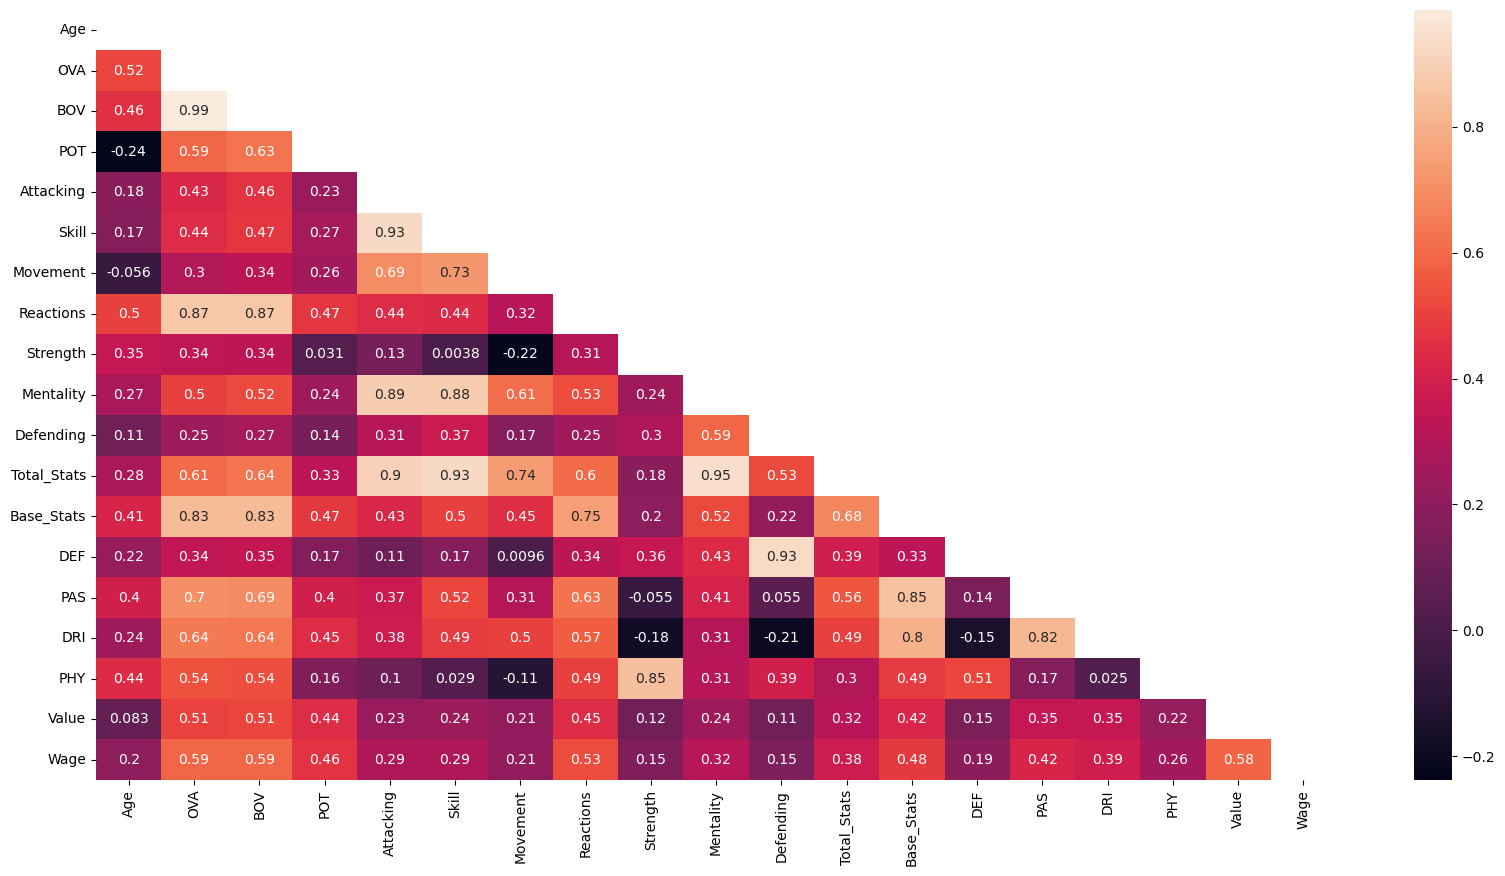

In [45]:
mask = np.zeros_like(fifa1_num.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(fifa1_num.corr(), mask=mask, annot=True)
plt.show()

In [46]:
#Droping Reactions because of 

fifa1_num= fifa1_num.drop(['Reactions'], axis=1)
fifa1_num.head()

,Age,OVA,BOV,POT,Attacking,Skill,Movement,Strength,Mentality,Defending,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage
0,33,69,71,69,313,338,347,68,320,208,1929,408,68,70,71,69,625000.0,7000.0
1,37,71,70,71,337,369,305,60,362,153,1906,385,58,73,69,63,600000.0,7000.0
2,33,71,71,71,337,387,295,56,317,99,1770,354,36,76,77,52,1100000.0,15000.0
3,36,68,70,82,264,255,176,66,271,75,1348,369,47,66,69,60,0.0,0.0
4,36,81,82,81,367,408,346,62,370,181,2014,420,63,85,85,59,5500000.0,12000.0


In [47]:
#sns.pairplot(fifa1_num)

### Splitting data (X-y Split)

In [48]:
y = fifa1_num['OVA']
X = fifa1_num.drop(['OVA'], axis=1)
X.head()

,Age,BOV,POT,Attacking,Skill,Movement,Strength,Mentality,Defending,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage
0,33,71,69,313,338,347,68,320,208,1929,408,68,70,71,69,625000.0,7000.0
1,37,70,71,337,369,305,60,362,153,1906,385,58,73,69,63,600000.0,7000.0
2,33,71,71,337,387,295,56,317,99,1770,354,36,76,77,52,1100000.0,15000.0
3,36,70,82,264,255,176,66,271,75,1348,369,47,66,69,60,0.0,0.0
4,36,82,81,367,408,346,62,370,181,2014,420,63,85,85,59,5500000.0,12000.0


In [49]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)
X_num

,Age,BOV,POT,Attacking,Skill,Movement,Strength,Mentality,Defending,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage
0,33,71,69,313,338,347,68,320,208,1929,408,68,70,71,69,625000.0,7000.0
1,37,70,71,337,369,305,60,362,153,1906,385,58,73,69,63,600000.0,7000.0
2,33,71,71,337,387,295,56,317,99,1770,354,36,76,77,52,1100000.0,15000.0
3,36,70,82,264,255,176,66,271,75,1348,369,47,66,69,60,0.0,0.0
4,36,82,81,367,408,346,62,370,181,2014,420,63,85,85,59,5500000.0,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,66,69,197,193,243,74,218,198,1367,302,64,37,48,69,550000.0,2000.0
17121,18,58,66,248,264,298,57,259,132,1529,319,43,57,56,55,130000.0,3000.0
17122,18,56,67,218,212,308,54,256,163,1430,303,54,44,52,55,130000.0,2000.0
17123,20,62,73,223,258,349,48,257,180,1579,335,59,58,59,54,475000.0,3000.0


### Normalized data (MinMax)

In [50]:
transformer = MinMaxScaler().fit(X_num) 
x_minmax = transformer.transform(X_num) 
print(x_minmax.shape)

(17125, 17)


In [51]:
X_num_norm = pd.DataFrame(x_minmax,columns=X_num.columns)
X_num_norm.head() 

,Age,BOV,POT,Attacking,Skill,Movement,Strength,Mentality,Defending,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage
0,0.459459,0.568627,0.458333,0.693069,0.690867,0.666667,0.641975,0.727763,0.749020,0.755836,0.666667,0.708861,0.661765,0.641791,0.636364,0.005924,0.012500
1,0.567568,0.549020,0.500000,0.752475,0.763466,0.547009,0.543210,0.840970,0.533333,0.741325,0.581481,0.582278,0.705882,0.611940,0.545455,0.005687,0.012500
2,0.459459,0.568627,0.500000,0.752475,0.805621,0.518519,0.493827,0.719677,0.321569,0.655521,0.466667,0.303797,0.750000,0.731343,0.378788,0.010427,0.026786
3,0.540541,0.549020,0.729167,0.571782,0.496487,0.179487,0.617284,0.595687,0.227451,0.389274,0.522222,0.443038,0.602941,0.611940,0.500000,0.000000,0.000000
4,0.540541,0.784314,0.708333,0.826733,0.854801,0.663818,0.567901,0.862534,0.643137,0.809464,0.711111,0.645570,0.882353,0.850746,0.484848,0.052133,0.021429


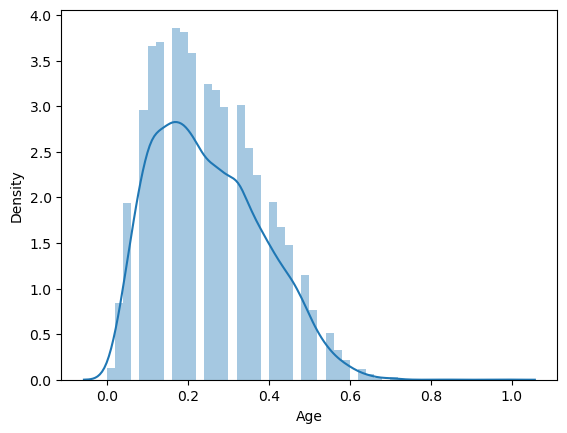

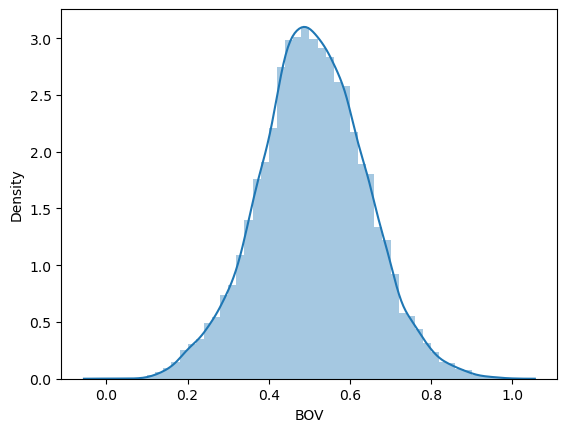

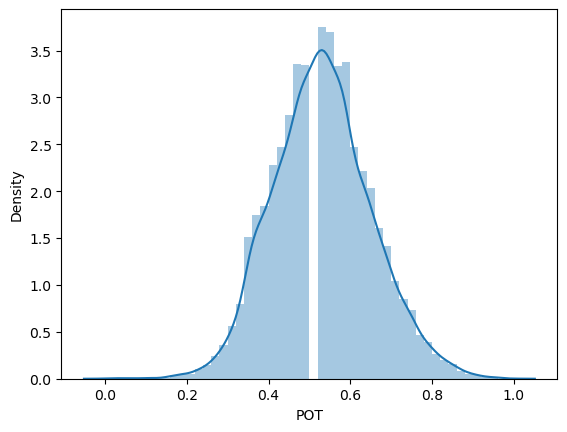

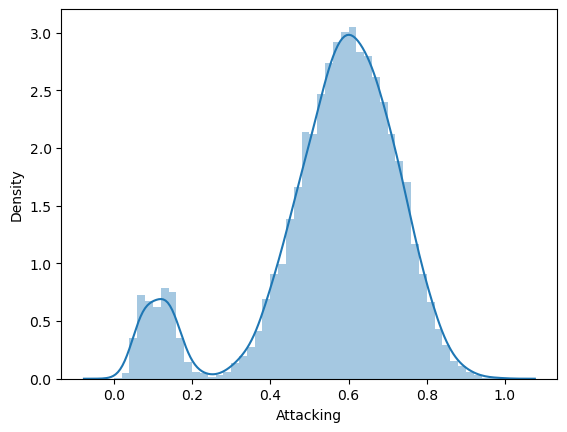

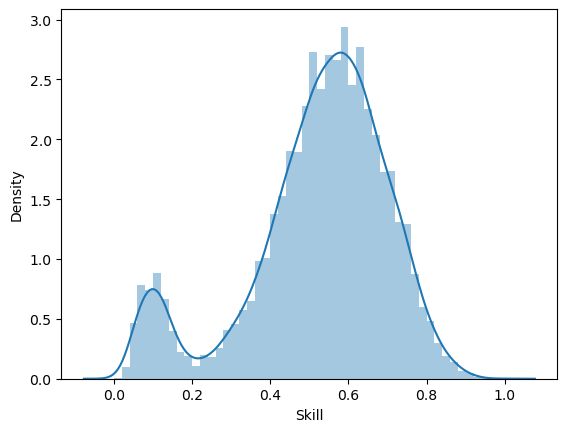

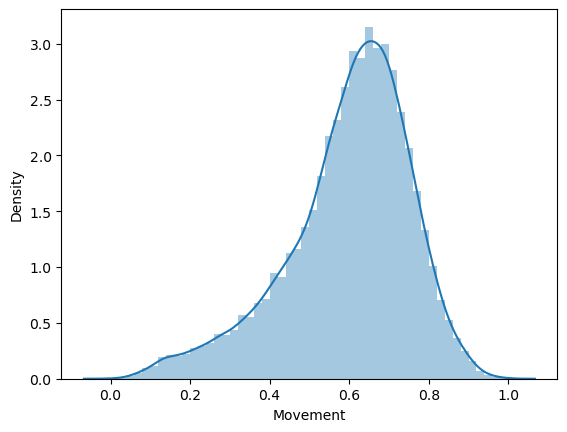

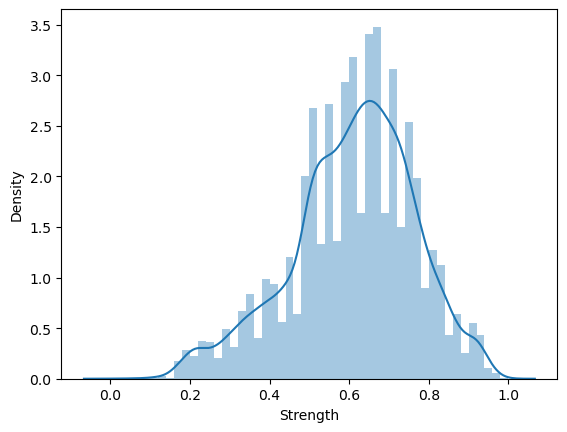

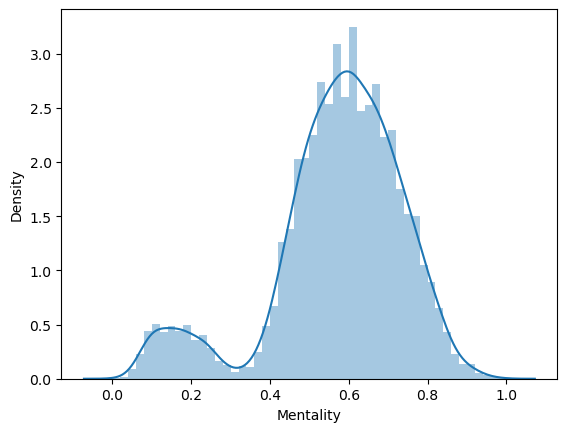

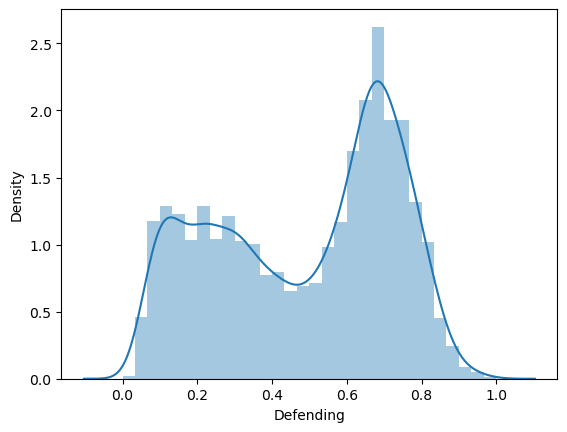

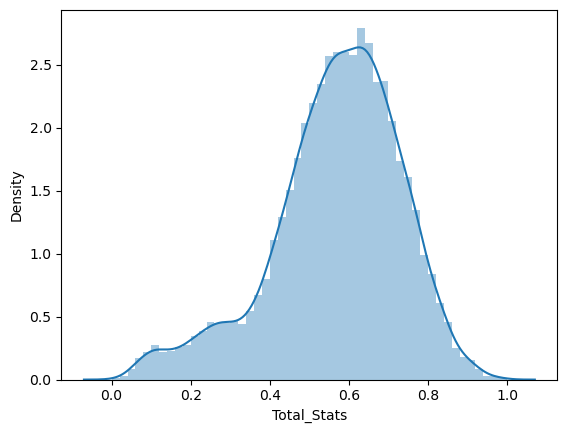

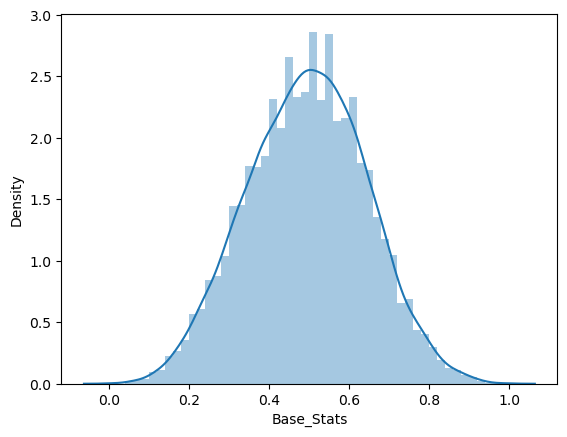

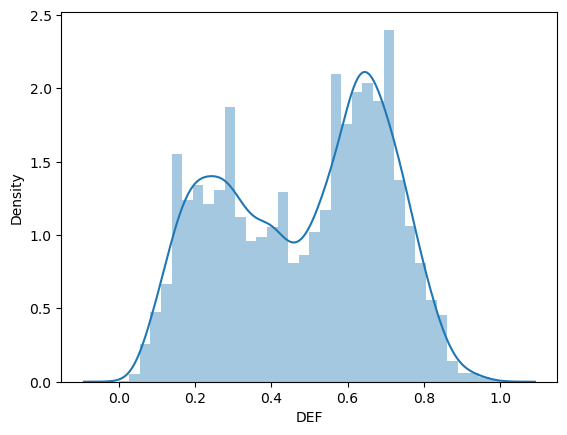

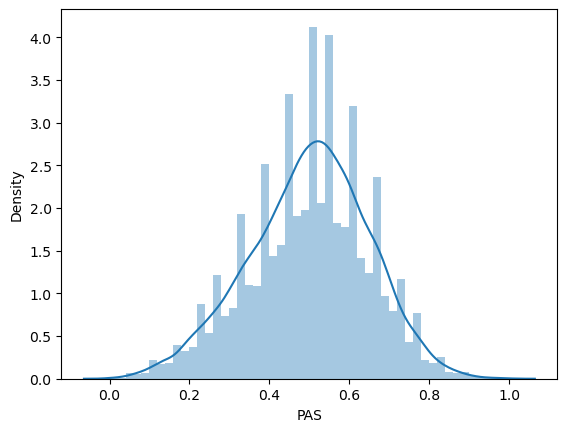

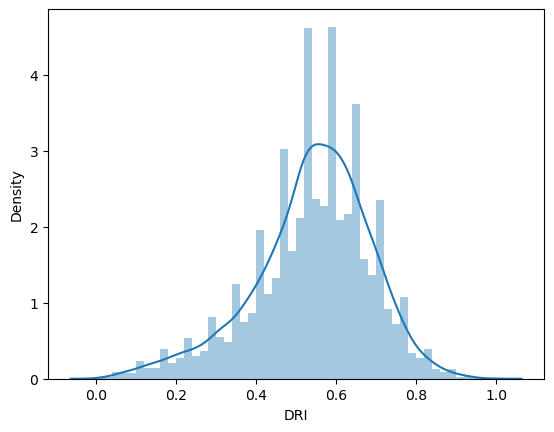

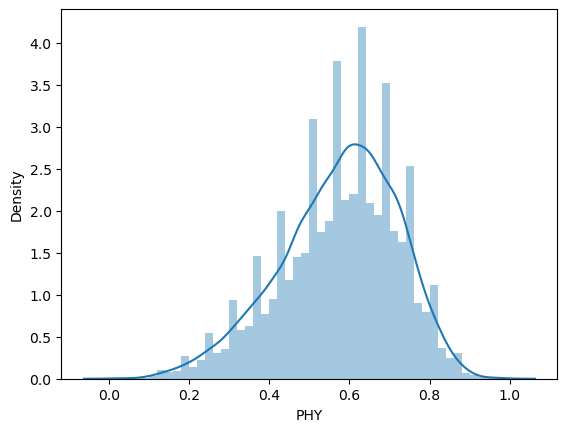

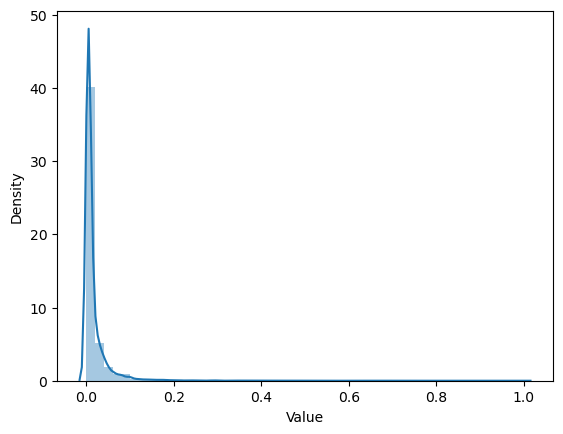

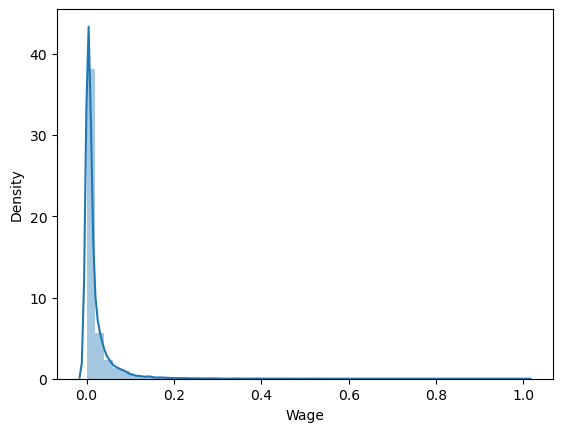

In [52]:
for column in X_num_norm.columns:
    sns.distplot(X_num_norm[column])
    plt.show()

### Stardardized data

In [53]:
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)

In [54]:
X_num_stand = pd.DataFrame(x_standardized, columns=X_num.columns)
X_num_stand.head()

,Age,BOV,POT,Attacking,Skill,Movement,Strength,Mentality,Defending,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage
0,1.563385,0.467024,-0.604843,0.753765,0.929503,0.442481,0.213153,0.923148,1.080150,1.143632,1.158424,1.052250,1.087080,0.690584,0.423322,-0.294640,-0.167083
1,2.372689,0.316361,-0.258209,1.085929,1.333111,-0.322101,-0.420418,1.590746,0.187197,1.055289,0.587011,0.458895,1.381589,0.487176,-0.197797,-0.301227,-0.167083
2,1.563385,0.467024,-0.258209,1.085929,1.567465,-0.504145,-0.737204,0.875463,-0.689520,0.532914,-0.183154,-0.846487,1.676098,1.300809,-1.336516,-0.169487,0.211261
3,2.170363,0.316361,1.648276,0.075598,-0.151127,-2.670460,0.054760,0.144284,-1.079173,-1.087985,0.189507,-0.193796,0.694400,0.487176,-0.508357,-0.459315,-0.498134
4,2.170363,2.124313,1.474959,1.501133,1.840877,0.424276,-0.262025,1.717908,0.641791,1.470116,1.456552,0.755573,2.559627,2.114441,-0.611877,0.989822,0.069382


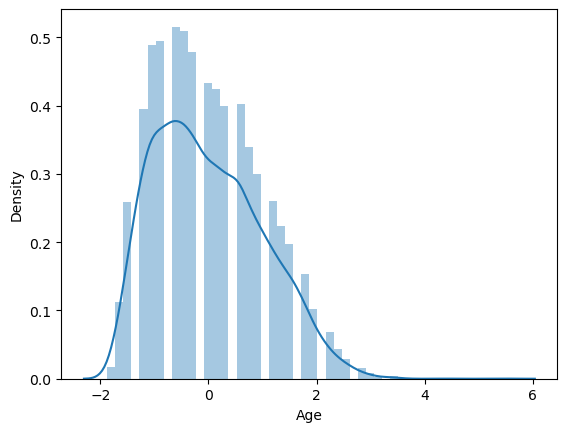

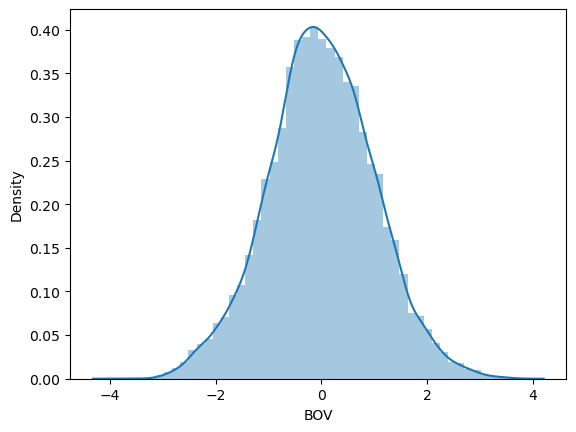

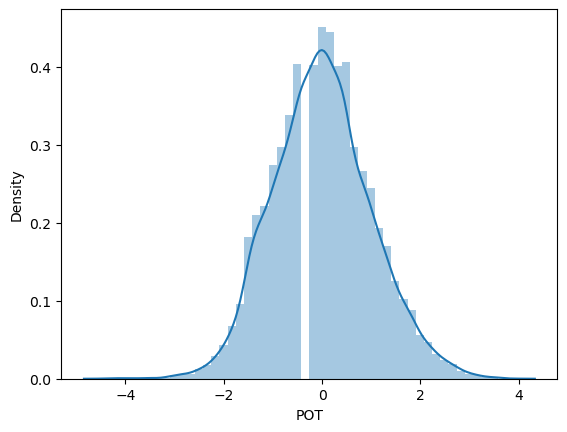

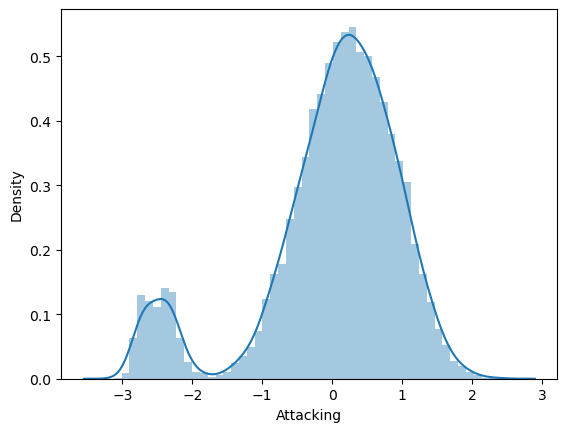

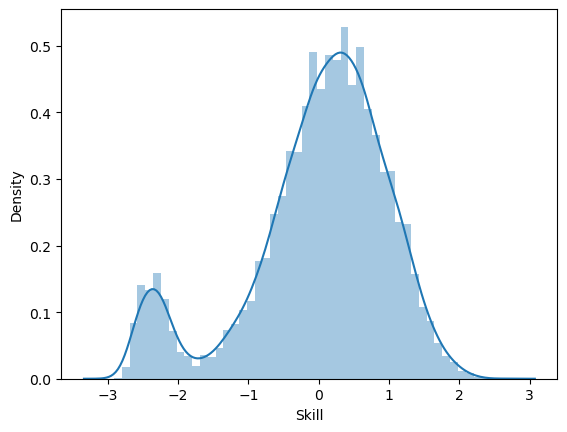

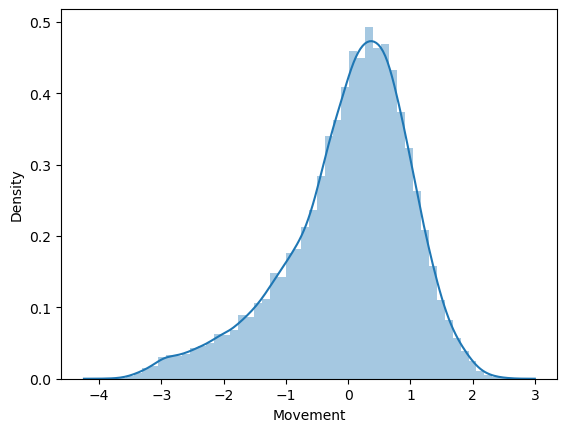

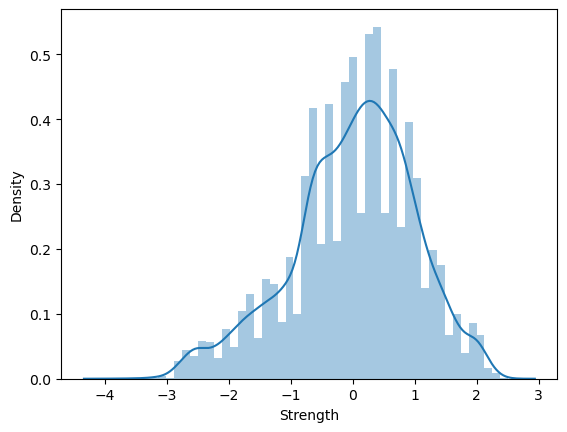

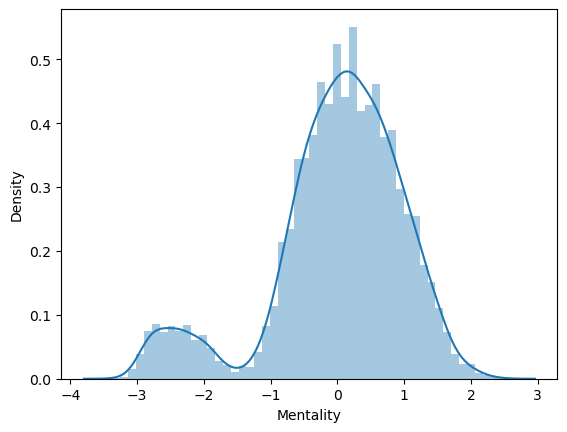

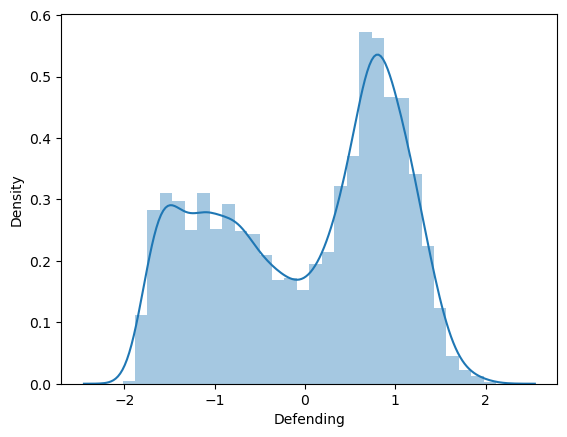

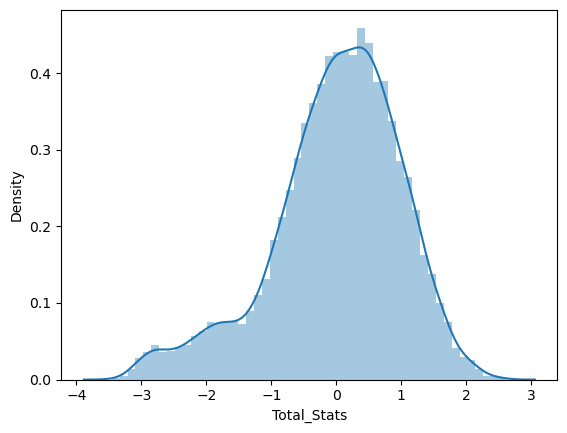

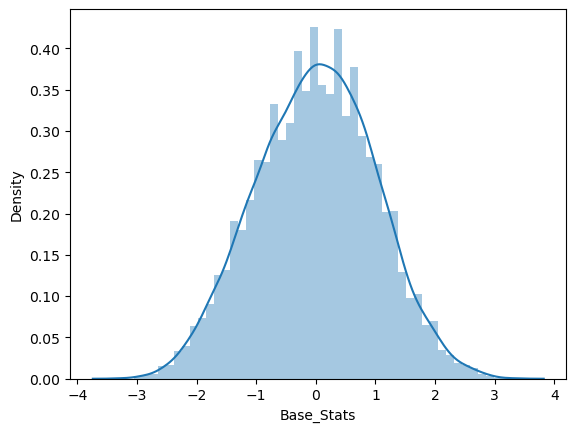

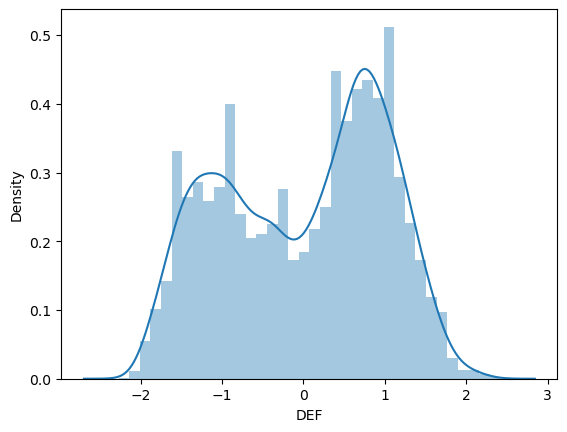

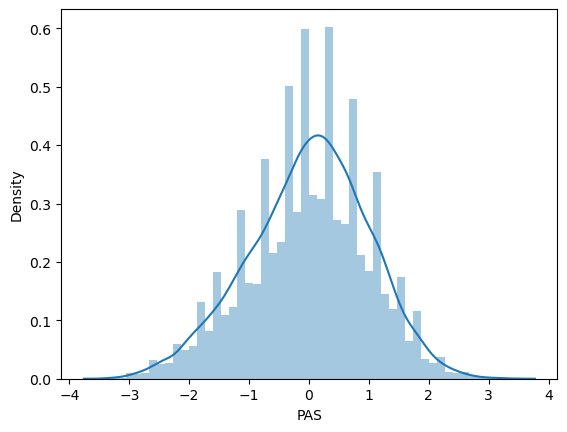

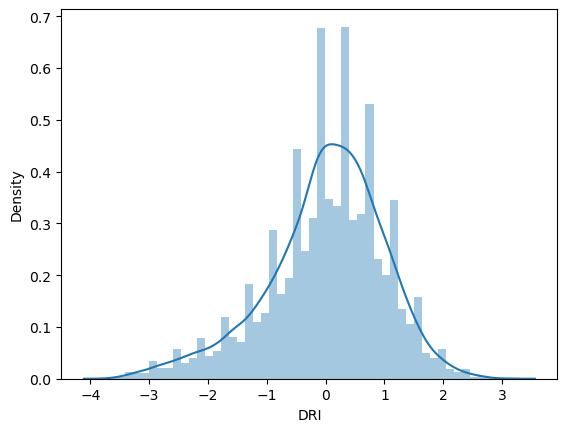

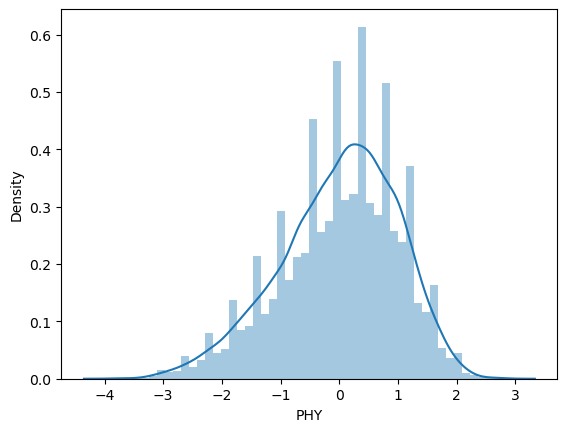

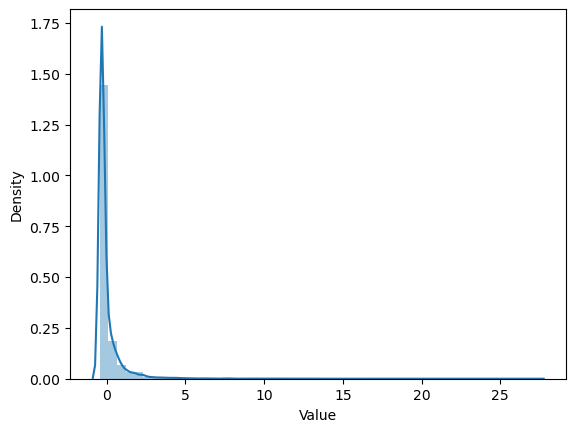

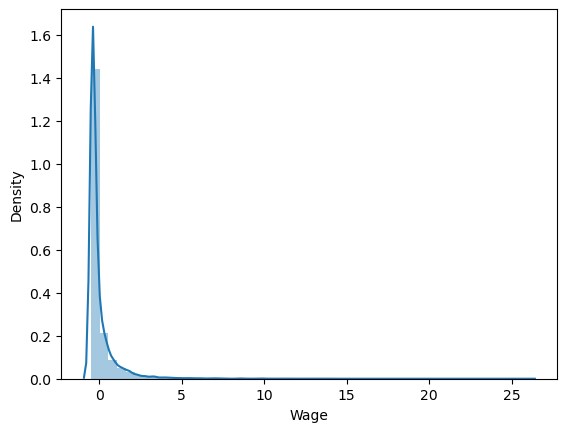

In [55]:
for column in X_num_stand.columns:
    sns.distplot(X_num_stand[column])
    plt.show()

### Checking Categorical dataset and transforming it to numbers

In [56]:
fifa1_cat.head()

,Name,Nationality,Club,BP
0,G. Pasquale,Italy,Udinese,LWB
1,Luis García,Spain,KAS Eupen,CM
2,J. Cole,England,Coventry City,CAM
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST
4,Iniesta,Spain,Vissel Kobe,CAM


In [57]:
fifa1_cat1= fifa1_cat.drop(['Name','Nationality', 'Club'], axis=1)
fifa1_cat1.head()

,BP
0,LWB
1,CM
2,CAM
3,ST
4,CAM


In [58]:
fifa1_cat1_dumm = pd.get_dummies(fifa1_cat1, drop_first=True) 
fifa1_cat1_dumm

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,1,0,0,0,0,0,0,0,0,0,0,0,0,0
17121,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17122,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17123,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Should  I concat X_num_stand with the encoded df or X_num_norm with encoded df?

In [59]:
fifa_num_cat = pd.concat([X_num_norm, fifa1_cat1_dumm], axis=1)
fifa_num_cat.head()

,Age,BOV,POT,Attacking,Skill,Movement,Strength,Mentality,Defending,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
0,0.459459,0.568627,0.458333,0.693069,0.690867,0.666667,0.641975,0.727763,0.749020,0.755836,0.666667,0.708861,0.661765,0.641791,0.636364,0.005924,0.012500,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.567568,0.549020,0.500000,0.752475,0.763466,0.547009,0.543210,0.840970,0.533333,0.741325,0.581481,0.582278,0.705882,0.611940,0.545455,0.005687,0.012500,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.459459,0.568627,0.500000,0.752475,0.805621,0.518519,0.493827,0.719677,0.321569,0.655521,0.466667,0.303797,0.750000,0.731343,0.378788,0.010427,0.026786,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.540541,0.549020,0.729167,0.571782,0.496487,0.179487,0.617284,0.595687,0.227451,0.389274,0.522222,0.443038,0.602941,0.611940,0.500000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.540541,0.784314,0.708333,0.826733,0.854801,0.663818,0.567901,0.862534,0.643137,0.809464,0.711111,0.645570,0.882353,0.850746,0.484848,0.052133,0.021429,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
fifa_num_cat.shape

(17125, 31)

In [61]:
X_num_norm.shape

(17125, 17)

In [62]:
fifa1_cat1_dumm.shape

(17125, 14)

In [63]:
y.shape

(17125,)

### Train-test split

In [64]:
fifa_num_cat_train, fifa_num_cat_test, y_train, y_test = train_test_split(fifa_num_cat, y, test_size=0.3, random_state=42)

### Checking NaNs

In [66]:
missing_values = fifa_num_cat_train.isna().sum()
print(missing_values)

Age            0
BOV            0
POT            0
Attacking      0
Skill          0
Movement       0
Strength       0
Mentality      0
Defending      0
Total_Stats    0
Base_Stats     0
DEF            0
PAS            0
DRI            0
PHY            0
Value          0
Wage           0
BP_CB          0
BP_CDM         0
BP_CF          0
BP_CM          0
BP_GK          0
BP_LB          0
BP_LM          0
BP_LW          0
BP_LWB         0
BP_RB          0
BP_RM          0
BP_RW          0
BP_RWB         0
BP_ST          0
dtype: int64


In [67]:
fifa_num_cat.isnull().values.any()

False

In [68]:
count = np.isinf(fifa_num_cat).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 0 infinite values


In [69]:
fifa_num_cat.describe()

,Age,BOV,POT,Attacking,Skill,Movement,Strength,Mentality,Defending,Total_Stats,Base_Stats,DEF,PAS,DRI,PHY,Value,Wage,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,0.250620,0.507847,0.531038,0.558262,0.523671,0.597418,0.608748,0.571220,0.488117,0.567985,0.493971,0.484381,0.498920,0.540446,0.574405,0.016524,0.018809,0.189898,0.072759,0.005197,0.057810,0.092029,0.053781,0.047007,0.012204,0.014715,0.052204,0.081985,0.019212,0.014715,0.155328
std,0.133586,0.130148,0.120207,0.178851,0.179881,0.156506,0.155892,0.169579,0.241550,0.164263,0.149083,0.213339,0.149805,0.146757,0.146368,0.035976,0.037760,0.392232,0.259748,0.071905,0.233391,0.289076,0.225592,0.211661,0.109800,0.120414,0.222445,0.274350,0.137272,0.120414,0.362228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135135,0.431373,0.458333,0.492574,0.442623,0.515670,0.518519,0.498652,0.262745,0.480126,0.388889,0.291139,0.397059,0.462687,0.484848,0.003081,0.001786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.243243,0.509804,0.520833,0.589109,0.552693,0.621083,0.629630,0.590296,0.552941,0.585489,0.496296,0.518987,0.514706,0.552239,0.590909,0.006398,0.005357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.351351,0.588235,0.604167,0.675743,0.646370,0.703704,0.716049,0.684636,0.694118,0.682019,0.600000,0.658228,0.602941,0.641791,0.681818,0.014218,0.019643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
fifa_num_cat.dtypes

Age            float64
BOV            float64
POT            float64
Attacking      float64
Skill          float64
Movement       float64
Strength       float64
Mentality      float64
Defending      float64
Total_Stats    float64
Base_Stats     float64
DEF            float64
PAS            float64
DRI            float64
PHY            float64
Value          float64
Wage           float64
BP_CB            uint8
BP_CDM           uint8
BP_CF            uint8
BP_CM            uint8
BP_GK            uint8
BP_LB            uint8
BP_LM            uint8
BP_LW            uint8
BP_LWB           uint8
BP_RB            uint8
BP_RM            uint8
BP_RW            uint8
BP_RWB           uint8
BP_ST            uint8
dtype: object

In [71]:
#fifa_num_cat = fifa_num_cat.astype('int')

In [74]:
print(fifa_num_cat.isnull().sum())
print(fifa_num_cat.isin([np.nan, np.inf, -np.inf]).sum())

Age            0
BOV            0
POT            0
Attacking      0
Skill          0
Movement       0
Strength       0
Mentality      0
Defending      0
Total_Stats    0
Base_Stats     0
DEF            0
PAS            0
DRI            0
PHY            0
Value          0
Wage           0
BP_CB          0
BP_CDM         0
BP_CF          0
BP_CM          0
BP_GK          0
BP_LB          0
BP_LM          0
BP_LW          0
BP_LWB         0
BP_RB          0
BP_RM          0
BP_RW          0
BP_RWB         0
BP_ST          0
dtype: int64
Age            0
BOV            0
POT            0
Attacking      0
Skill          0
Movement       0
Strength       0
Mentality      0
Defending      0
Total_Stats    0
Base_Stats     0
DEF            0
PAS            0
DRI            0
PHY            0
Value          0
Wage           0
BP_CB          0
BP_CDM         0
BP_CF          0
BP_CM          0
BP_GK          0
BP_LB          0
BP_LM          0
BP_LW          0
BP_LWB         0
BP_RB          0
B

In [75]:
model = LinearRegression()
model.fit(fifa_num_cat_train,y_train)

LinearRegression()

### Predict on test data

In [77]:
predictions  = model.predict(fifa_num_cat_test)
predictions

array([58.57150821, 65.09125724, 61.64245589, ..., 64.85864463,
       74.75171983, 67.18297012])

In [78]:
y_test

15195    59
14193    65
16722    62
8037     68
6350     76
         ..
7576     61
2030     77
11632    65
39       75
6141     68
Name: OVA, Length: 5138, dtype: int64

### Evaluate the model

In [79]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.9829226915959414
RMSE =  0.8945692349222293
MSE =  0.8002541160693427
